## Final Task Project-Based Virtual Internship: Home Credit Indonesia x Rakamin Academy

### Home Credit Scorecard Model

##### Mhd. Arsya Fikri | mhdarsyafikri@gmail.com

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
data_dir = 'dataset/'
os.listdir(data_dir)

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

Pada tugas ini, disediakan 7 dataset yang dapat dianalisa, yaitu:
- `application_{train | test}.csv`
- `previous_application.csv`
- `POS_CASH_balance.csv`
- `installments_payments.csv`
- `credit_card_balance.csv`
- `bureau.csv`
- `bureau_balance.csv`

Namun, setelah dilakukan analisa dan pemahaman terhadap keseluruhan dataset, maka pada tugas ini kita hanya akan menggunakan 3 dataset saja, yaitu:
- `application_{train | test}.csv`: sebagai dataset utama yang akan dilakukan proses analisa dan modelling untuk memprediksi, apakah sebuah pengajuan kredit tersebut dapat terlunasi atau tidak.
- `previous_application.csv`: sebagai dataset informasi tambahan tentang berapa banyak pengajuan kredit yang dulu pernah diajukan di Home Credit Indonesia oleh customer yang sama, yang sedang mengajukan kredit saat ini. Dan berapa banyak riwayat status kreditnya yang dahulu, jenis apa yang diajukan dan status kreditnya saat ini.
- `bureau.csv`: sebagai dataset informasi tambahan tentang berapa banyak pengajuan kredit yang dulu pernah diajukan oleh customer yang sama, yang sedang mengajukan kredit saat ini. Pengajuan kredit ini diambil dari pencatatan lembaga Biro Kredit lain. Untuk melihat berapa banyak riwayat kreditnya dan apa statusnya saat ini.

# Import Dataset

In [3]:
# import ketiga dataset untuk dilakukan pembersihan dan pemrosesan
df_main_train = pd.read_csv('dataset/application_train.csv')
df_main_test = pd.read_csv('dataset/application_test.csv')
df_prev = pd.read_csv('dataset/previous_application.csv')
df_biro = pd.read_csv('dataset/bureau.csv')

## Proses Dataset Previous_Application

In [4]:
df_prev.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
# Proses dataset previous_application untuk mengambil jumlah kredit masa lalu di HCI per SK_ID_CURR

# Ambil hanya kolom-kolom yang akan digunakan
df_prev = df_prev[['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS']]

# Untuk setiap nilai 'XNA' pada kolom 'NAME_CONTRACT_TYPE' diubah menjadi NULL
df_prev['NAME_CONTRACT_TYPE'].replace({'XNA': np.nan}, inplace =True)

#Lakukan imputasi random untuk setiap nilai NULL di kolom 'NAME_CONTRACT_TYPE'
# Define a list of possible categories
categ_list = ['Consumer loans', 'Cash loans', 'Revolving loans']
# Replace null values in 'TYPE' column with random categories
df_prev['NAME_CONTRACT_TYPE'] = df_prev['NAME_CONTRACT_TYPE'].fillna(
                                        pd.Series(np.random.choice(categ_list, size=len(df_prev.index))))

df_prev

C:\Users\USER\AppData\Local\Temp/ipykernel_1048/3097524041.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prev['NAME_CONTRACT_TYPE'].replace({'XNA': np.nan}, inplace =True)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,Approved
1,2802425,108129,Cash loans,Approved
2,2523466,122040,Cash loans,Approved
3,2819243,176158,Cash loans,Approved
4,1784265,202054,Cash loans,Refused
...,...,...,...,...
1670209,2300464,352015,Consumer loans,Approved
1670210,2357031,334635,Consumer loans,Approved
1670211,2659632,249544,Consumer loans,Approved
1670212,2785582,400317,Cash loans,Approved


In [6]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 4 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   SK_ID_PREV            1670214 non-null  int64 
 1   SK_ID_CURR            1670214 non-null  int64 
 2   NAME_CONTRACT_TYPE    1670214 non-null  object
 3   NAME_CONTRACT_STATUS  1670214 non-null  object
dtypes: int64(2), object(2)
memory usage: 51.0+ MB


In [7]:
# Hitung jumlah data untuk setiap kategori di kolom 'NAME_CONTRACT_TYPE' dan 'NAME_CONTRACT_STATUS'
# menggunakan grouping data per kolom 'SK_ID_CURR'

# Hitung jumlah data per kategori di kolom 'NAME_CONTRACT_TYPE'
df_prev_type_A = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_TYPE'].apply(lambda x: (x=='Consumer loans').sum()).reset_index(name='CNT_PREV_TYPE_CNSMR_LOANS')
df_prev_type_B = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_TYPE'].apply(lambda x: (x=='Cash loans').sum()).reset_index(name='CNT_PREV_TYPE_CASH_LOANS')
df_prev_type_C = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_TYPE'].apply(lambda x: (x=='Revolving loans').sum()).reset_index(name='CNT_PREV_TYPE_REVOL_LOANS')

# Hitung jumlah data per kategori di kolom 'NAME_CONTRACT_STATUS'
df_prev_stat_A = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].apply(lambda x: (x=='Approved').sum()).reset_index(name='CNT_PREV_STAT_APPROVED')
df_prev_stat_B = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].apply(lambda x: (x=='Refused').sum()).reset_index(name='CNT_PREV_STAT_REFUSED')
df_prev_stat_C = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].apply(lambda x: (x=='Canceled').sum()).reset_index(name='CNT_PREV_STAT_CANCELED')
df_prev_stat_D = df_prev.groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS'].apply(lambda x: (x=='Unused offer').sum()).reset_index(name='CNT_PREV_STAT_UNUSED')

# list semua dataframe yang terpisah-pisah
prev_list = [df_prev_type_A, df_prev_type_B, df_prev_type_C, df_prev_stat_A, df_prev_stat_B, df_prev_stat_C, df_prev_stat_D]

# inner join semua dataframe yang terpisah menjadi satu dataframe dengan 'SK_ID_CURR'
from functools import reduce
df_prev_cnt = reduce(lambda  left,right: pd.merge(left,right,on=['SK_ID_CURR'],
                                            how='inner'), prev_list)

df_prev_cnt

,SK_ID_CURR,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED
0,100001,1,0,0,1,0,0,0
1,100002,1,0,0,1,0,0,0
2,100003,2,1,0,3,0,0,0
3,100004,1,0,0,1,0,0,0
4,100005,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
338852,456251,1,0,0,1,0,0,0
338853,456252,1,0,0,1,0,0,0
338854,456253,2,0,0,2,0,0,0
338855,456254,2,0,0,2,0,0,0


In [8]:
df_prev_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338857 entries, 0 to 338856
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   SK_ID_CURR                 338857 non-null  int64
 1   CNT_PREV_TYPE_CNSMR_LOANS  338857 non-null  int64
 2   CNT_PREV_TYPE_CASH_LOANS   338857 non-null  int64
 3   CNT_PREV_TYPE_REVOL_LOANS  338857 non-null  int64
 4   CNT_PREV_STAT_APPROVED     338857 non-null  int64
 5   CNT_PREV_STAT_REFUSED      338857 non-null  int64
 6   CNT_PREV_STAT_CANCELED     338857 non-null  int64
 7   CNT_PREV_STAT_UNUSED       338857 non-null  int64
dtypes: int64(8)
memory usage: 20.7 MB


DataFrame `df_prev_cnt` siap digunakan untuk di-join ke dalam dataset utama untuk proses EDA dan Modelling

## Proses Dataset Bureau

In [9]:
df_biro.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

In [10]:
# Proses dataset bureau untuk mengambil jumlah kredit masa lalu dari data Biro Kredit eksternal per SK_ID_CURR
# Pemrosesan dataset bureau memiliki prinsip yang sama dengan dataset previous_application. Hitung jumlah data 
# untuk setiap kategori di kolom 'CREDIT_ACTIVE' menggunakan grouping data per kolom 'SK_ID_CURR'

# Hitung jumlah data per kategori di kolom 'CREDIT_ACTIVE'
df_biro_cnt_A = df_biro.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].apply(lambda x: (x=='Active').sum()).reset_index(name='CNT_BUREAU_ACTIVE')
df_biro_cnt_B = df_biro.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].apply(lambda x: (x=='Bad debt').sum()).reset_index(name='CNT_BUREAU_BAD_DEBT')
df_biro_cnt_C = df_biro.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].apply(lambda x: (x=='Closed').sum()).reset_index(name='CNT_BUREAU_CLOSED')
df_biro_cnt_S = df_biro.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].apply(lambda x: (x=='Sold').sum()).reset_index(name='CNT_BUREAU_SOLD')

# list semua dataframe yang terpisah-pisah
bureau_list = [df_biro_cnt_A, df_biro_cnt_B, df_biro_cnt_C, df_biro_cnt_S]

# inner join semua dataframe yang terpisah menjadi satu dataframe dengan 'SK_ID_CURR'
df_biro_cnt = reduce(lambda  left,right: pd.merge(left,right,on=['SK_ID_CURR'],
                                            how='inner'), bureau_list)

df_biro_cnt

,SK_ID_CURR,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD
0,100001,3,0,4,0
1,100002,2,0,6,0
2,100003,1,0,3,0
3,100004,0,0,2,0
4,100005,2,0,1,0
...,...,...,...,...,...
305806,456249,2,0,11,0
305807,456250,2,0,1,0
305808,456253,2,0,2,0
305809,456254,0,0,1,0


In [11]:
df_biro_cnt.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   SK_ID_CURR           305811 non-null  int64
 1   CNT_BUREAU_ACTIVE    305811 non-null  int64
 2   CNT_BUREAU_BAD_DEBT  305811 non-null  int64
 3   CNT_BUREAU_CLOSED    305811 non-null  int64
 4   CNT_BUREAU_SOLD      305811 non-null  int64
dtypes: int64(5)
memory usage: 11.7 MB


DataFrame `df_biro_cnt` siap digunakan untuk di-join ke dalam dataset utama untuk proses EDA dan Modelling

## Proses Dataset Application_train + Application_test (dataset utama)

In [12]:
df_main_train = pd.concat([df_main_train, df_main_test], ignore_index=True)

In [13]:
df_main_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    356255 non-null  int64  
 1    TARGET                        307511 non-null  float64
 2    NAME_CONTRACT_TYPE            356255 non-null  object 
 3    CODE_GENDER                   356255 non-null  object 
 4    FLAG_OWN_CAR                  356255 non-null  object 
 5    FLAG_OWN_REALTY               356255 non-null  object 
 6    CNT_CHILDREN                  356255 non-null  int64  
 7    AMT_INCOME_TOTAL              356255 non-null  float64
 8    AMT_CREDIT                    356255 non-null  float64
 9    AMT_ANNUITY                   356219 non-null  float64
 10   AMT_GOODS_PRICE               355977 non-null  float64
 11   NAME_TYPE_SUITE               354052 non-null  object 
 12   NAME_INCOME_TYPE            

Setelah dilakukan analisa terhadap setiap kolom, berikut adalah kolom-kolom yang akan dihapus dan tidak digunakan dalam proses selanjutnya:
- `{index: 95 - 121}`; Tidak memiliki keterkaitan dengan kolom target atau permasalahan yang hendak ddiselesaikan atau tidak memiliki penjelasan yang cukup mengenai fungsi kolom.
- `{index: 21, 28, 41, 43 - 90}`; Memiliki jumlah missing rows yang cukup besar dan dipertimbangkan untuk tidak dilakukan imputasi. 28: Dapat diwakilkan dengan kolom 40.

Catatan tambahan: `{index: 20 - 23}` dalam bentuk hari, kita ubah dengan membagi 365 dan pembulatan ke bawah agar dalam bentuk tahun.

In [14]:
# Menghapus kolom-kolom yang tidak digunakan

del_col = [21, 28, 41]
add = list(range(43, 91))
add2 = list(range(95, 122))

# buat list yang berisi index kolom yang hendak dihapus
del_col = del_col + add + add2

print(del_col)

[21, 28, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]


In [15]:
# drop the column based on the index
df_main_train.drop(df_main_train.columns[del_col], axis=1, inplace=True)

In [16]:
df_main_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,0.648575,1.0,0.0,1.0,0.0
356251,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,0.684596,2.0,0.0,2.0,0.0
356252,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.632770,0.0,0.0,0.0,0.0
356253,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,-13968,-2731,-1461.0,-1364,1,1,1,1,1,0,2.0,2,2,MONDAY,10,0,1,1,0,1,1,Self-employed,0.445701,0.0,0.0,0.0,0.0


Untuk `CODE_GENDER` dan `NAME_FAMILY_STATUS` terdapat kategori `XNA` dan `Unknown`. Kedua data ini dapat dianggap sebagai data `NULL` atau memang data tidak diketahui. Namun, karena jumlahnya yang cukup sedikit, maka dilakukan imputasi modus untuk kedua kolom tersebut.

In [17]:
# Replace value XNA menggunakan nilai modus
df_main_train['CODE_GENDER'].replace({'XNA': df_main_train['CODE_GENDER'].mode()[0]}, inplace =True)

# Replace value Unknown menggunakan nilai modus
df_main_train['NAME_FAMILY_STATUS'].replace({'Unknown': df_main_train['NAME_FAMILY_STATUS'].mode()[0]}, inplace =True)

print(df_main_train['CODE_GENDER'].unique())
print(df_main_train['NAME_FAMILY_STATUS'].unique())

['M' 'F']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']


C:\Users\USER\AppData\Local\Temp/ipykernel_1048/4122457098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main_train['CODE_GENDER'].replace({'XNA': df_main_train['CODE_GENDER'].mode()[0]}, inplace =True)
C:\Users\USER\AppData\Local\Temp/ipykernel_1048/4122457098.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [18]:
df_main_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   AMT_INCOME_TOTAL             356255 non-null  float64
 8   AMT_CREDIT                   356255 non-null  float64
 9   AMT_ANNUITY                  356219 non-null  float64
 10  AMT_GOODS_PRICE              355977 non-null  float64
 11  NAME_TYPE_SUITE              354052 non-null  object 
 12  NAME_INCOME_TYPE             356255 non-null  object 
 13 

### Proses Join dengan DataFrame Bureau dan Previou Application

Proses join dilakukan dengan metode Left Join. Untuk setiap ID yang memiliki nilai NULL akibat proses join, maka akan digantikan dengan nilai 0 (nol).

In [19]:
# Join DataFrame utama dengan DataFrame Previous Application
df_train = df_main_train.merge(df_prev_cnt, on='SK_ID_CURR', how='left')

# Join DataFrame hasil join sebelumnya dengan DataFrame Bureau
df_train = df_train.merge(df_biro_cnt, on='SK_ID_CURR', how='left')

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,2.0,5.0,2.0,5.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,2.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,0.648575,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
356251,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,0.684596,2.0,0.0,2.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
356252,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.632770,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
356253,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,-13968,-2731,-1461.0,-1364,1,1,1,1,1,0,2.0,2,

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   AMT_INCOME_TOTAL             356255 non-null  float64
 8   AMT_CREDIT                   356255 non-null  float64
 9   AMT_ANNUITY                  356219 non-null  float64
 10  AMT_GOODS_PRICE              355977 non-null  float64
 11  NAME_TYPE_SUITE              354052 non-null  object 
 12  NAME_INCOME_TYPE             356255 non-null  object 
 13 

# Handling Missing Values

Penanganan missing values untuk kolom `{index: 44 - 54}` adalah dengan mengubah nilai `NULL` menjadi 0 (nol). Data missing diakibatkan dari proses join dengan dua DataFrame sebelumnya.

In [21]:
# Define index kolom yang akan di-fill
col_pos = list(range(44, 55))

# Fill setiap kolom yang telah dispesifikkan dengan nilai 0
df_train.iloc[:, col_pos] = df_train.iloc[:, col_pos].fillna(0)

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,2.0,5.0,2.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,2.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,1,1,1,1,1,0,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,0.648575,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
356251,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149,-3015.0,-3003,1,1,0,1,0,0,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,0.684596,2.0,0.0,2.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356252,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037,-2681.0,-1504,1,1,0,1,1,0,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.632770,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
356253,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,-13968,-2731,-1461.0,-1364,1,1,1,1,1,0,2.0,2,

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   AMT_INCOME_TOTAL             356255 non-null  float64
 8   AMT_CREDIT                   356255 non-null  float64
 9   AMT_ANNUITY                  356219 non-null  float64
 10  AMT_GOODS_PRICE              355977 non-null  float64
 11  NAME_TYPE_SUITE              354052 non-null  object 
 12  NAME_INCOME_TYPE             356255 non-null  object 
 13 

Untuk missing values dengan data numerik diisi menggunakan nilai mean kolom tersebut. Untuk kolom kategorikal diisi menggunakan nilai modus dari kolom tersebut.

In [23]:
# Fill missing values kolom kategorikal
df_train[['NAME_TYPE_SUITE']] = df_train[['NAME_TYPE_SUITE']].fillna(df_train.mode().iloc[0])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   AMT_INCOME_TOTAL             356255 non-null  float64
 8   AMT_CREDIT                   356255 non-null  float64
 9   AMT_ANNUITY                  356219 non-null  float64
 10  AMT_GOODS_PRICE              355977 non-null  float64
 11  NAME_TYPE_SUITE              356255 non-null  object 
 12  NAME_INCOME_TYPE             356255 non-null  object 
 13 

In [24]:
# Fill missing values kolom kategorikal
# Define list kolom-kolom yang akan dilakukan proses imputas
cols_miss = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
                 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
# Fill missing values dengan nilai mean
df_train[cols_miss] = df_train[cols_miss].fillna(df_train[cols_miss].mean())

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           356255 non-null  object 
 3   CODE_GENDER                  356255 non-null  object 
 4   FLAG_OWN_CAR                 356255 non-null  object 
 5   FLAG_OWN_REALTY              356255 non-null  object 
 6   CNT_CHILDREN                 356255 non-null  int64  
 7   AMT_INCOME_TOTAL             356255 non-null  float64
 8   AMT_CREDIT                   356255 non-null  float64
 9   AMT_ANNUITY                  356255 non-null  float64
 10  AMT_GOODS_PRICE              356255 non-null  float64
 11  NAME_TYPE_SUITE              356255 non-null  object 
 12  NAME_INCOME_TYPE             356255 non-null  object 
 13 

Untuk kolom `DAYS...` yang merupakan kolom-kolom yang menghitung hari relatif terhadap tanggal pengajuan pinjaman, kita ubah menjadi tahun, untuk meningkatkan readibility dan memudahkan pemahaman pesebaran data.

In [25]:
# buat fungsi untuk menghitung tahun
def count_years(x):
    years = abs(x) // 365
    
    return int(years)

# Apply fungsi sebelumnya untuk konversi nilai hari menjadi tahun dan tampung di kolom baru
df_train['CURR_AGE'] = np.vectorize(count_years)(df_train['DAYS_BIRTH'])
df_train['YEARS_EMPLOYED'] = np.vectorize(count_years)(df_train['DAYS_EMPLOYED'])
df_train['YEARS_REGISTRATION'] = np.vectorize(count_years)(df_train['DAYS_REGISTRATION'])
df_train['YEARS_ID_PUBLISH'] = np.vectorize(count_years)(df_train['DAYS_ID_PUBLISH'])

# hapus kolom-kolom yang tidak digunakan
df_train = df_train.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'])

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,25,1,9,5
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,45,3,3,0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,52,0,11,6
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,2.0,5.0,2.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,52,8,26,6
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,2.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54,8,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,1,1,1,1,1,0,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,0.648575,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,54,14,24,9
356251,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,1,1,0,1,0,0,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,0.684596,2.0,0.0,2.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,3,8,8
356252,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,1,1,0,1,1,0,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.632770,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,43,8,7,4
356253,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,1,1,1,1,1,0,2.0,2,2,MONDAY,10,0,1,1,0,1,1,Self-employed,0.445701,0.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,1.0,0.0,6.0,0.0,11.0,0.0,38,7,4,3


In [26]:
data_train = df_train.loc[df_train['TARGET'].notna()]

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13  NAME

In [27]:
data_test = df_train.loc[df_train['TARGET'].isna()]
data_test = data_test.drop('TARGET', axis=1)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48744 entries, 307511 to 356254
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48744 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_TYPE_SUITE              48744 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
 12  NAME_EDUCATION_TYPE          48744 non-null  object 
 13  NAME_FAMILY_STA

# Exploratory Data Analysis

## - Pesebaran 'Good' dan 'Bad' Clients (kolom TARGET)

C:\Users\USER\AppData\Local\Temp/ipykernel_1048/3305843348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data_train['TARGET'], palette='Set2')


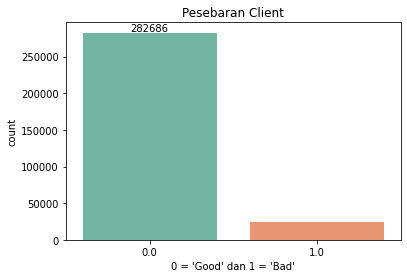

In [28]:
# melihat pesebaran data menggunakan Countplot
fig = plt.figure()
ax = sns.countplot(x=data_train['TARGET'], palette='Set2')
ax.bar_label(ax.containers[0])

plt.title("Pesebaran Client")
plt.xlabel("0 = 'Good' dan 1 = 'Bad'")
plt.show()

Terlihat pesebaran data sangat tidak seimbang (imbalance data). Lebih dari 90% data yang dimiliki adalah klien dengan masalah pembayaran ('Bad' clients). Hal ini menjadi catatan penting dalam pemilihan metrik evaluasi saat melakukan modelling.

## - Kolom-kolom Kategorikal terhadap Kolom TARGET

In [29]:
# fungsi untuk mempermudah visualisasi kolom kategorikal
def vis_cat(cat_column, title_count, title_stacked, label):
    fig = plt.figure(figsize=(12, 5))
    
    ax = fig.add_subplot(121)
    sns.countplot(data=data_train, x=cat_column, hue='TARGET', palette = 'Set2')
    ax.set_title(title_count)
    plt.xlabel(label)
    plt.ylabel("Count")
    for i in ax.containers:
        ax.bar_label(i,)
    
    ax2 = fig.add_subplot(122)
    pd.crosstab(data_train[cat_column], data_train['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, ax=ax2, rot=0)
    ax2.set_title(title_stacked)
    plt.xlabel(label)
    plt.ylabel("Persentase")

    fig.tight_layout(pad=2)

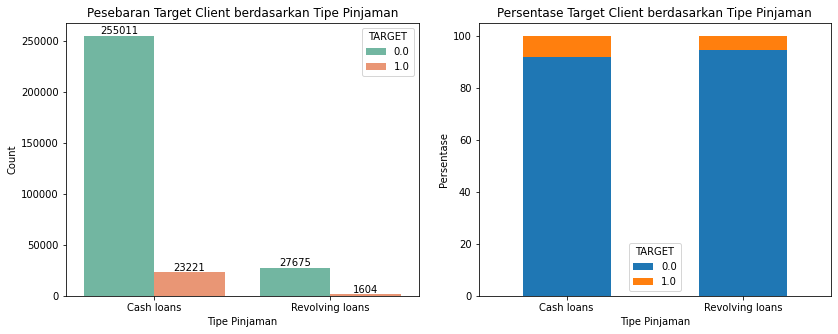

In [30]:
# pesebaran jenis pinjaman dan perbandingannya dengan TARGET
col = 'NAME_CONTRACT_TYPE'
title_c = 'Pesebaran Target Client berdasarkan Tipe Pinjaman'
title_b = 'Persentase Target Client berdasarkan Tipe Pinjaman'
label = 'Tipe Pinjaman'

vis_cat(col, title_c, title_b, label)

Terlihat jenis pinjaman yang paling banyak adalah Cash loans, dan jumlah 'Bad' client terbanyak juga adalah jenis Cash loans. Namun, jika dilihat dari persentase 'Bad' client pada kedua jenis pinjaman kurang lebih sama.

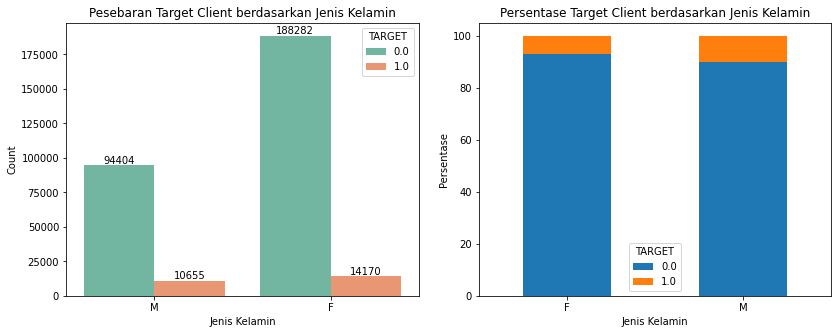

In [31]:
# pesebaran jenis kelamin dan perbandingannya dengan TARGET
col = 'CODE_GENDER'
title_c = 'Pesebaran Target Client berdasarkan Jenis Kelamin'
title_b = 'Persentase Target Client berdasarkan Jenis Kelamin'
label = 'Jenis Kelamin'

vis_cat(col, title_c, title_b, label)

Terlihat jenis kelamin yang paling banyak adalah perempuan, dan jumlah 'Bad' client terbanyak juga perempuan. Namun, jika dilihat dari persentase 'Bad' client pada kedua jenis kelamin kurang lebih sama.

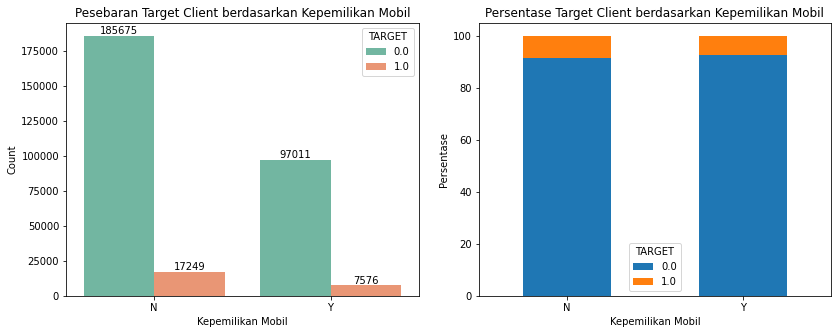

In [32]:
# pesebaran kepemilikan mobil dan perbandingannya dengan TARGET
col = 'FLAG_OWN_CAR'
title_c = 'Pesebaran Target Client berdasarkan Kepemilikan Mobil'
title_b = 'Persentase Target Client berdasarkan Kepemilikan Mobil'
label = 'Kepemilikan Mobil'

vis_cat(col, title_c, title_b, label)

Terlihat client yang paling banyak adalah tidak memiliki mobil, dan jumlah 'Bad' client terbanyak juga yang tidak memiliki mobil. Namun, jika dilihat dari persentase 'Bad' client pada kepemilikan mobil kurang lebih sama.

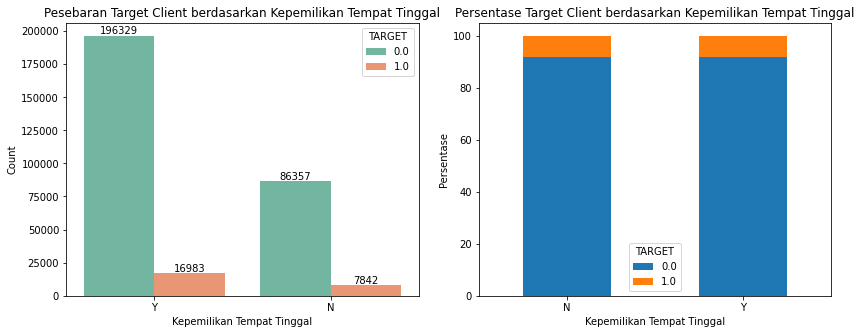

In [33]:
# pesebaran kepemilikan tempat tinggal dan perbandingannya dengan TARGET
col = 'FLAG_OWN_REALTY'
title_c = 'Pesebaran Target Client berdasarkan Kepemilikan Tempat Tinggal'
title_b = 'Persentase Target Client berdasarkan Kepemilikan Tempat Tinggal'
label = 'Kepemilikan Tempat Tinggal'

vis_cat(col, title_c, title_b, label)

Terlihat client yang paling banyak adalah yang memiliki tempat tinggal, dan jumlah 'Bad' client terbanyak juga yang memiliki tempat tinggal. Namun, jika dilihat dari persentase 'Bad' client pada kepemilikan tempat tinggal kurang lebih sama.

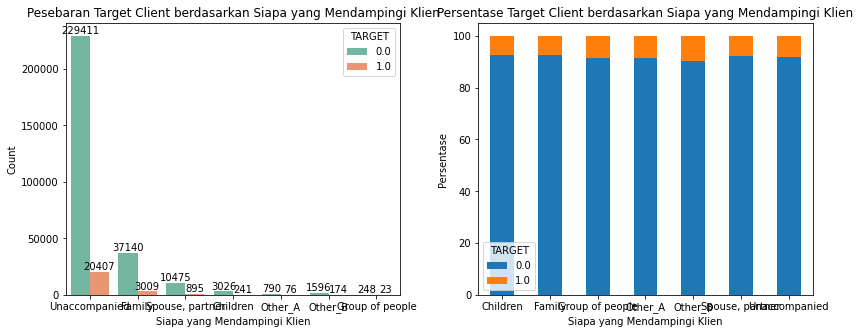

In [34]:
# pesebaran data pendamping klien dan perbandingannya dengan TARGET
col = 'NAME_TYPE_SUITE'
title_c = 'Pesebaran Target Client berdasarkan Siapa yang Mendampingi Klien'
title_b = 'Persentase Target Client berdasarkan Siapa yang Mendampingi Klien'
label = 'Siapa yang Mendampingi Klien'

vis_cat(col, title_c, title_b, label)

Text(0, 0.5, 'Persentase')

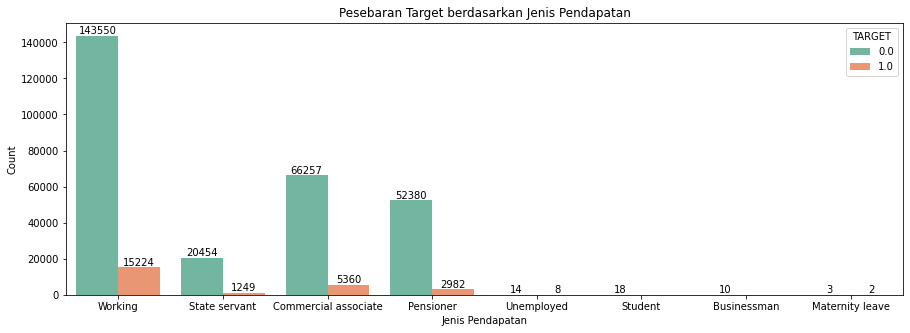

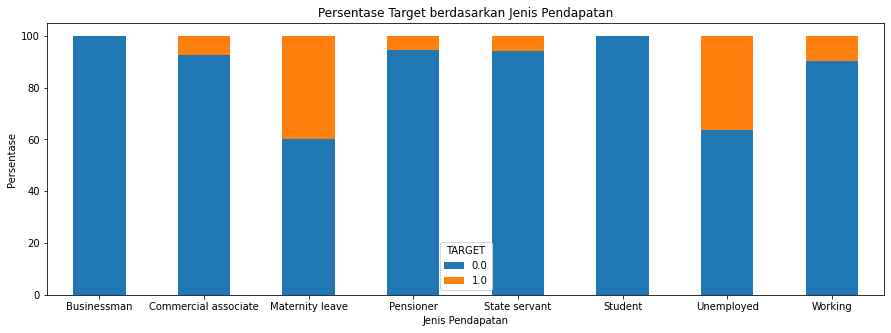

In [35]:
# pesebaran data sumber pendapatan dan perbandingannya dengan TARGET
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(data=data_train, x=data_train['NAME_INCOME_TYPE'], hue='TARGET', palette = 'Set2')
ax.set_title("Pesebaran Target berdasarkan Jenis Pendapatan")
plt.xlabel("Jenis Pendapatan")
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

ax2 = pd.crosstab(data_train['NAME_INCOME_TYPE'], data_train['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, rot=0, figsize=(15, 5))
ax2.set_title("Persentase Target berdasarkan Jenis Pendapatan")
plt.xlabel("Jenis Pendapatan")
plt.ylabel("Persentase")

Terlihat client yang paling banyak mengajukan kredit adalah yang memiliki pendapatan dari bekerja, dan jumlah 'Bad' client terbanyak juga yang memiliki pendapatan dari bekerja. Namun, jika dilihat dari persentase 'Bad' client , urutan persentase terparah sumber income yang 'Bad' adalah Unemployed, Working, dan Commercial Associate. Namun perbedaan tidak terlalu jauh. Sedangkan Student dan Businessman tidak ada 'Bad' client.

Text(0, 0.5, 'Persentase')

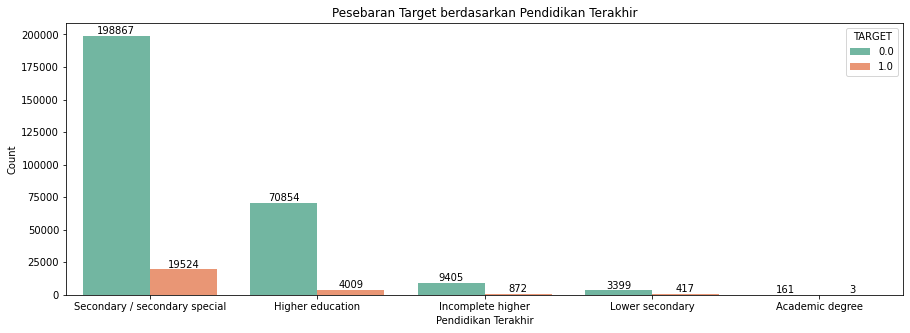

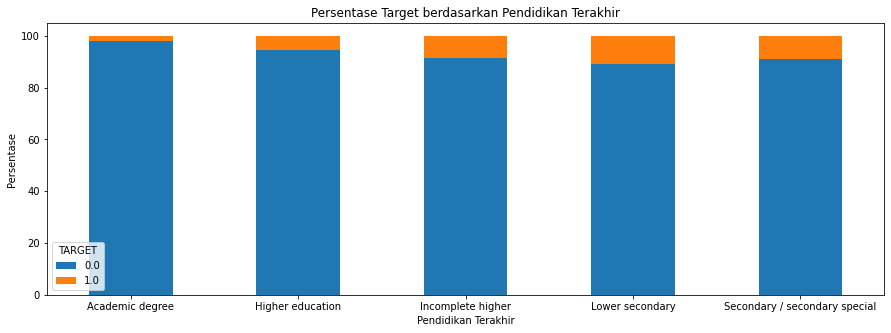

In [36]:
# pesebaran data pendidikan terakhir klien dan perbandingannya dengan TARGET
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(data=data_train, x=data_train['NAME_EDUCATION_TYPE'], hue='TARGET', palette = 'Set2')
ax.set_title("Pesebaran Target berdasarkan Pendidikan Terakhir")
plt.xlabel("Pendidikan Terakhir")
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

ax2 = pd.crosstab(data_train['NAME_EDUCATION_TYPE'], data_train['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, rot=0, figsize=(15, 5))
ax2.set_title("Persentase Target berdasarkan Pendidikan Terakhir")
plt.xlabel("Pendidikan Terakhir")
plt.ylabel("Persentase")

Terlihat client yang paling banyak mengajukan kredit adalah yang memiliki pendidikan terakhir Secondary / Secondary special dan jumlah 'Bad' client terbanyak juga dimiliki kategori ini. Namun, jika dilihat dari persentase 'Bad' client , urutan persentase terparah pendidikan terakhir yang 'Bad' adalah Lower secondary, Incomplete higher, dan Secondary / Secondary specia. Namun perbedaan tidak terlalu jauh. Sedangkan Academic degree memiliki persentase sangat kecil, tapi sayangnya jumlah yang mengajukan sangat sedikit. Ini dapat didorong dengan melakukan marketing yang menargetkan klien dengan pendidikan Akademis.

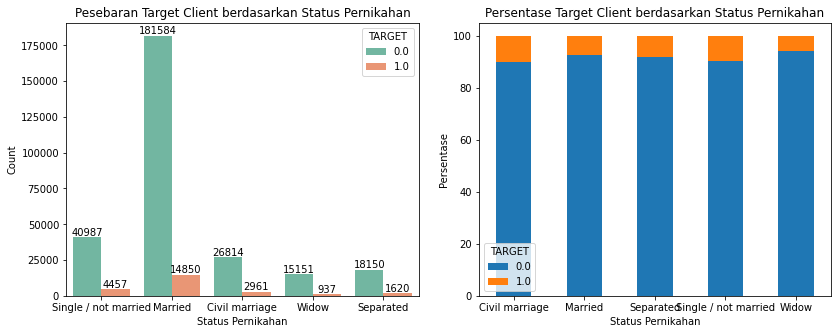

In [37]:
# pesebaran data Status Pernikahan dan perbandingannya dengan TARGET
col = 'NAME_FAMILY_STATUS'
title_c = 'Pesebaran Target Client berdasarkan Status Pernikahan'
title_b = 'Persentase Target Client berdasarkan Status Pernikahan'
label = 'Status Pernikahan'

vis_cat(col, title_c, title_b, label)

Terlihat client yang paling banyak adalah yang menikah, dan jumlah 'Bad' client terbanyak juga yang menikah. Namun, jika dilihat dari persentase 'Bad' client semua kategori pernikahan kurang lebih sama.

Text(0, 0.5, 'Persentase')

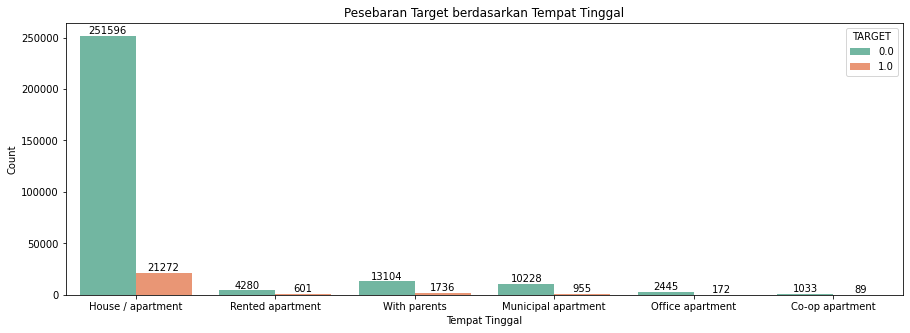

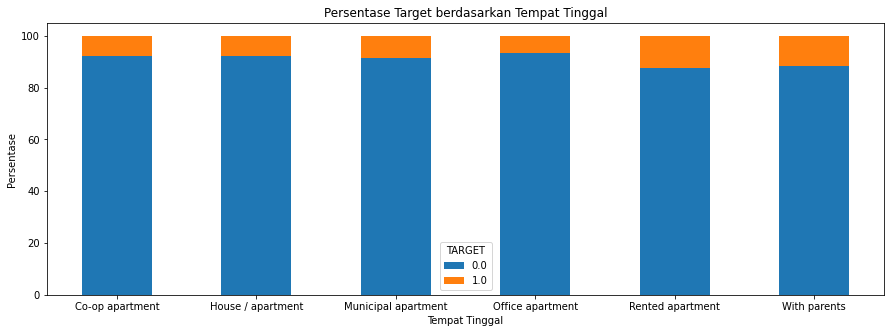

In [38]:
# pesebaran data Tempat Tinggal dan perbandingannya dengan TARGET
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(data=data_train, x=data_train['NAME_HOUSING_TYPE'], hue='TARGET', palette = 'Set2')
ax.set_title("Pesebaran Target berdasarkan Tempat Tinggal")
plt.xlabel("Tempat Tinggal")
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

ax2 = pd.crosstab(data_train['NAME_HOUSING_TYPE'], data_train['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, rot=0, figsize=(15, 5))
ax2.set_title("Persentase Target berdasarkan Tempat Tinggal")
plt.xlabel("Tempat Tinggal")
plt.ylabel("Persentase")

Terlihat client yang paling banyak adalah yang tinggal di rumah atau apartemen pribadi, dan jumlah 'Bad' client terbanyak juga dikategori yang sama. Namun, jika dilihat dari persentase 'Bad' client kategori yang persentase 'Bad' terbesar adalah yang mengontrak dan tinggal bersama orang tua.

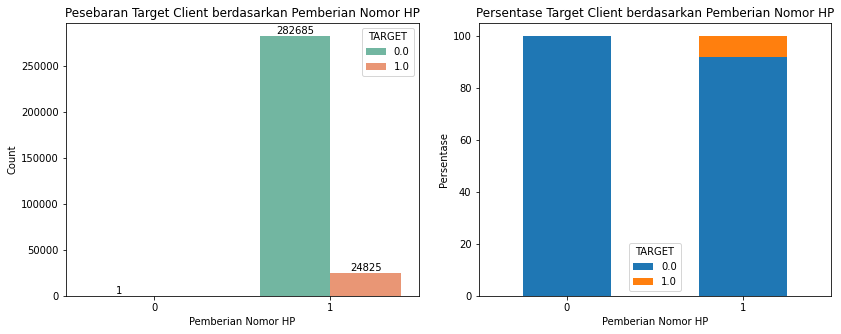

In [39]:
# pesebaran data Pemberian Nomor HP dan perbandingannya dengan TARGET
col = 'FLAG_MOBIL'
title_c = 'Pesebaran Target Client berdasarkan Pemberian Nomor HP'
title_b = 'Persentase Target Client berdasarkan Pemberian Nomor HP'
label = 'Pemberian Nomor HP'

vis_cat(col, title_c, title_b, label)

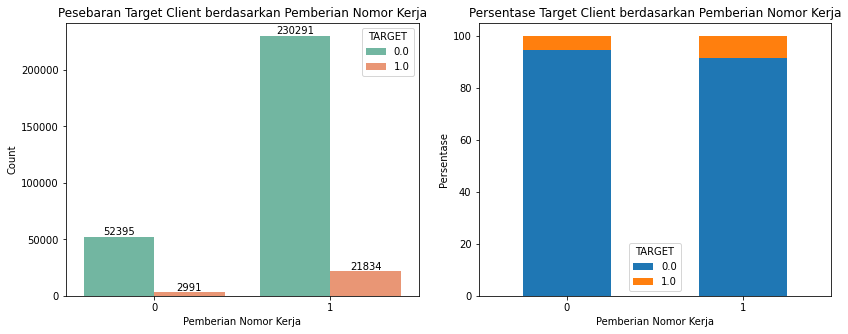

In [40]:
# pesebaran data Pemberian Nomor Kerja dan perbandingannya dengan TARGET
col = 'FLAG_EMP_PHONE'
title_c = 'Pesebaran Target Client berdasarkan Pemberian Nomor Kerja'
title_b = 'Persentase Target Client berdasarkan Pemberian Nomor Kerja'
label = 'Pemberian Nomor Kerja'

vis_cat(col, title_c, title_b, label)

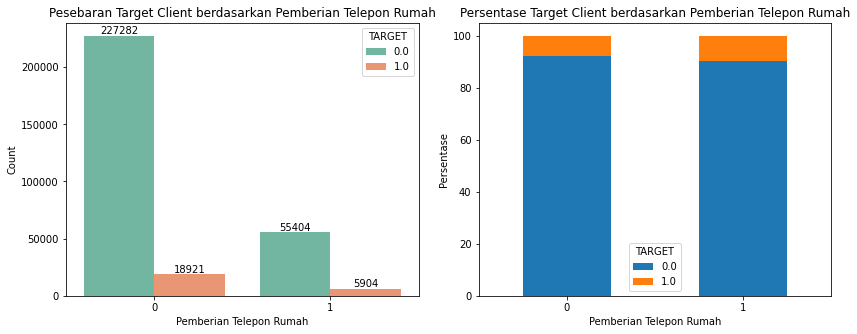

In [41]:
# pesebaran data Pemberian Telepon Rumah dan perbandingannya dengan TARGET
col = 'FLAG_WORK_PHONE'
title_c = 'Pesebaran Target Client berdasarkan Pemberian Telepon Rumah'
title_b = 'Persentase Target Client berdasarkan Pemberian Telepon Rumah'
label = 'Pemberian Telepon Rumah'

vis_cat(col, title_c, title_b, label)

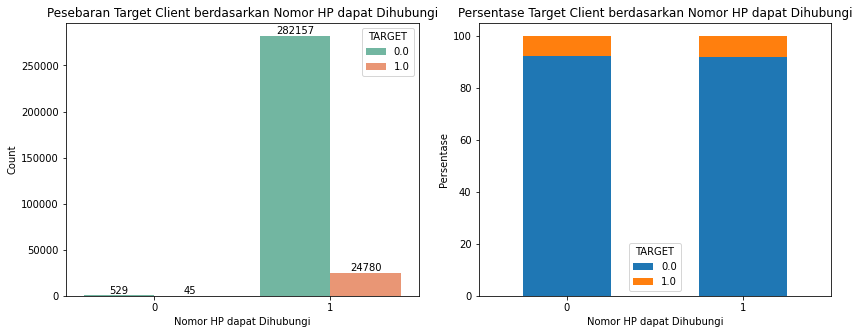

In [42]:
# pesebaran data nomor HP dapat dihubungi dan perbandingannya dengan TARGET
col = 'FLAG_CONT_MOBILE'
title_c = 'Pesebaran Target Client berdasarkan Nomor HP dapat Dihubungi'
title_b = 'Persentase Target Client berdasarkan Nomor HP dapat Dihubungi'
label = 'Nomor HP dapat Dihubungi'

vis_cat(col, title_c, title_b, label)

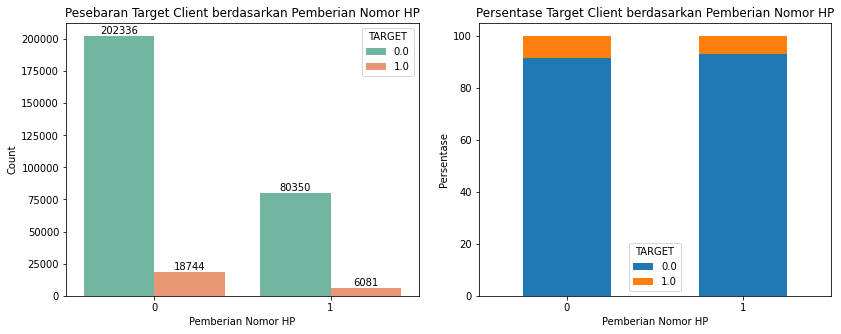

In [43]:
# pesebaran data Pemberian Nomor HP dan perbandingannya dengan TARGET
col = 'FLAG_PHONE'
title_c = 'Pesebaran Target Client berdasarkan Pemberian Nomor HP'
title_b = 'Persentase Target Client berdasarkan Pemberian Nomor HP'
label = 'Pemberian Nomor HP'

vis_cat(col, title_c, title_b, label)

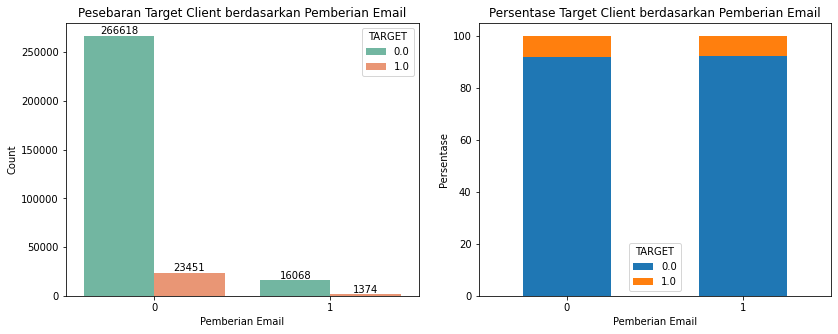

In [44]:
# pesebaran data Pemberian Email dan perbandingannya dengan TARGET
col = 'FLAG_EMAIL'
title_c = 'Pesebaran Target Client berdasarkan Pemberian Email'
title_b = 'Persentase Target Client berdasarkan Pemberian Email'
label = 'Pemberian Email'

vis_cat(col, title_c, title_b, label)

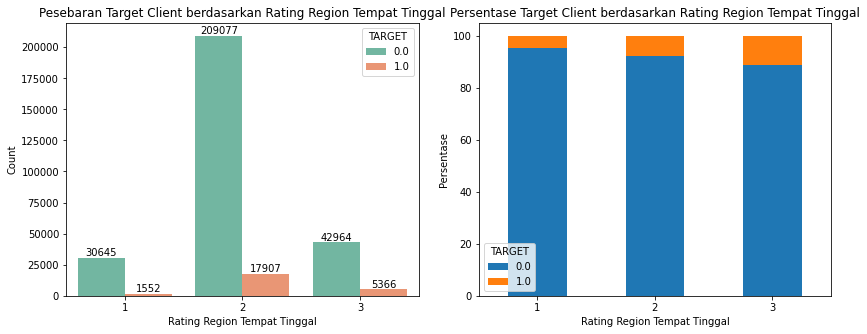

In [45]:
# pesebaran data Rating Region Tempat Tinggal dan perbandingannya dengan TARGET
col = 'REGION_RATING_CLIENT'
title_c = 'Pesebaran Target Client berdasarkan Rating Region Tempat Tinggal'
title_b = 'Persentase Target Client berdasarkan Rating Region Tempat Tinggal'
label = 'Rating Region Tempat Tinggal'

vis_cat(col, title_c, title_b, label)

Terlihat persentase 'Bad' client terbesar ada di region dengan rating 3

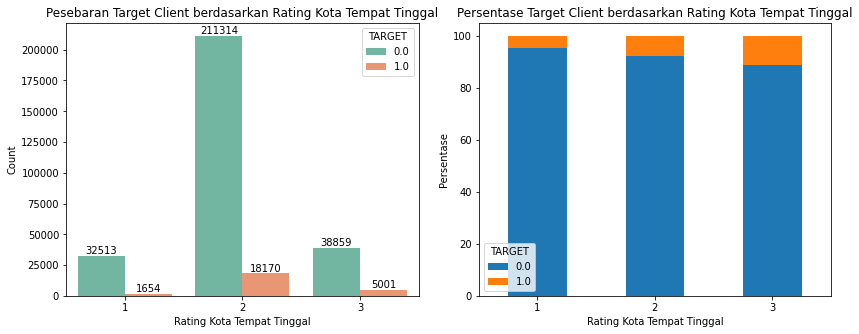

In [46]:
# pesebaran data Rating Kota Tempat Tinggal dan perbandingannya dengan TARGET
col = 'REGION_RATING_CLIENT_W_CITY'
title_c = 'Pesebaran Target Client berdasarkan Rating Kota Tempat Tinggal'
title_b = 'Persentase Target Client berdasarkan Rating Kota Tempat Tinggal'
label = 'Rating Kota Tempat Tinggal'

vis_cat(col, title_c, title_b, label)

Terlihat persentase 'Bad' client terbesar ada di kota dengan rating 3

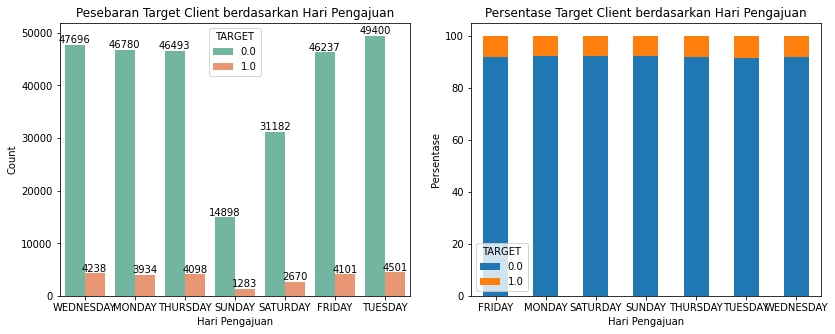

In [47]:
# pesebaran data Hari Pengajuan dan perbandingannya dengan TARGET
col = 'WEEKDAY_APPR_PROCESS_START'
title_c = 'Pesebaran Target Client berdasarkan Hari Pengajuan'
title_b = 'Persentase Target Client berdasarkan Hari Pengajuan'
label = 'Hari Pengajuan'

vis_cat(col, title_c, title_b, label)

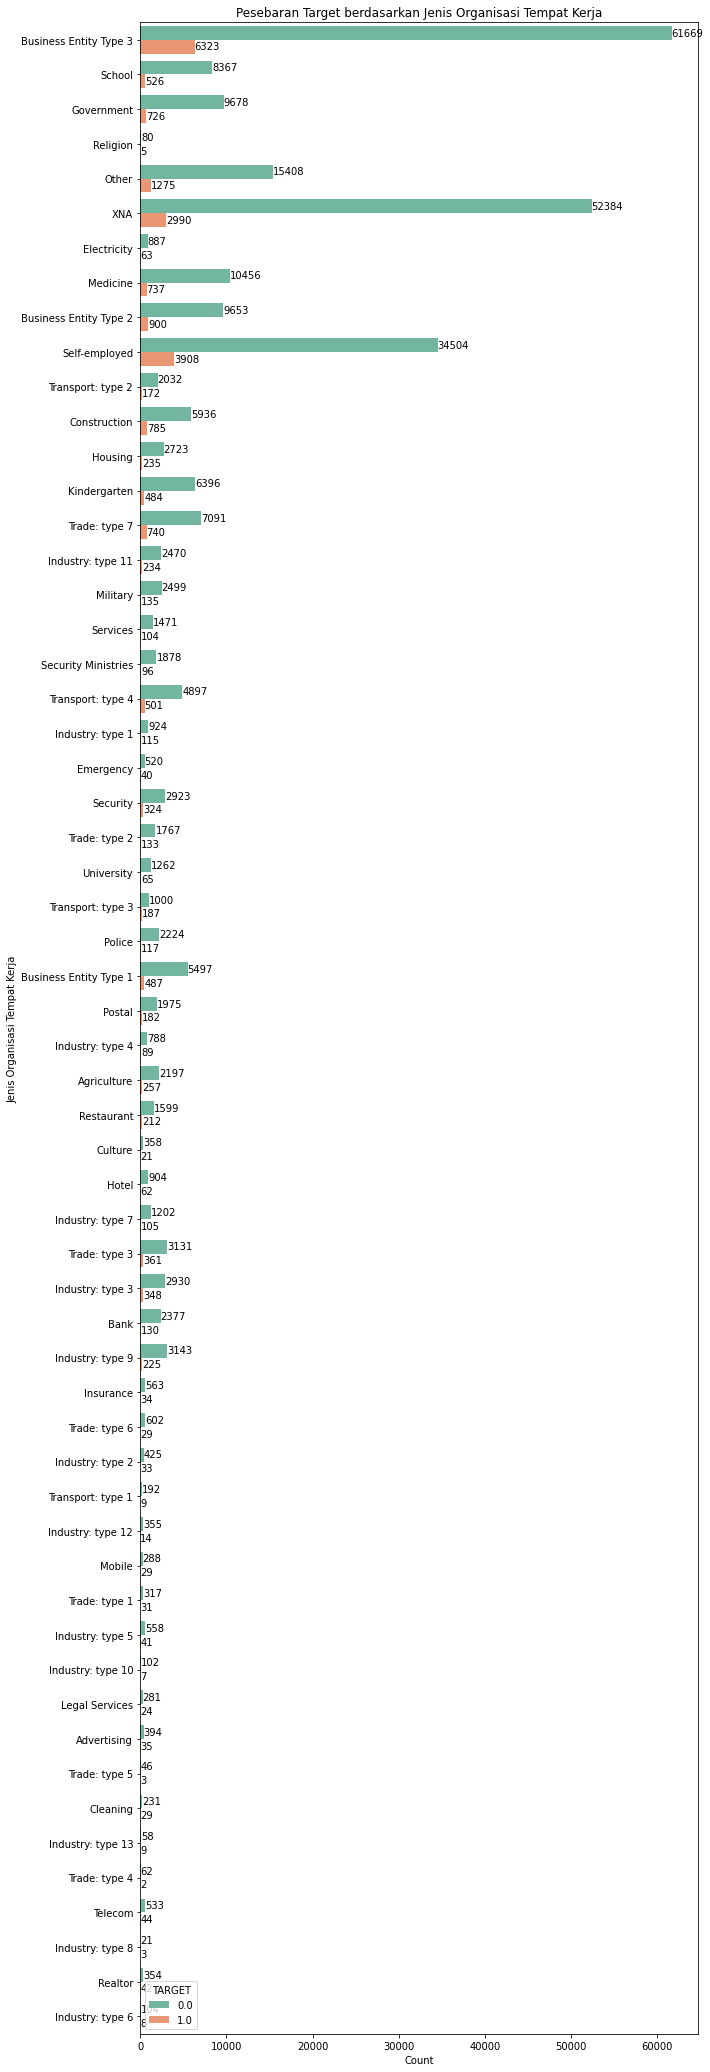

In [48]:
# pesebaran data Jenis Organisasi Tempat Kerja dan perbandingannya dengan TARGET
fig = plt.figure(figsize=(10, 37))
ax = sns.countplot(data=data_train, y=data_train['ORGANIZATION_TYPE'], hue='TARGET', palette = 'Set2')
ax.set_title("Pesebaran Target berdasarkan Jenis Organisasi Tempat Kerja")
plt.xlabel("Count")
plt.ylabel("Jenis Organisasi Tempat Kerja")
for i in ax.containers:
    ax.bar_label(i,)

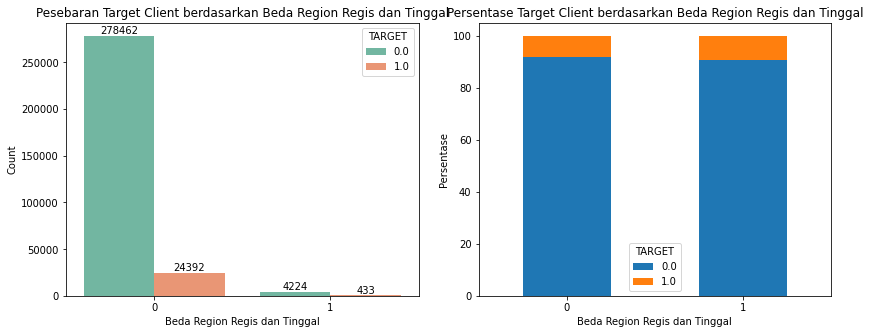

In [49]:
# pesebaran data Beda Region Regis dan Tinggal dan perbandingannya dengan TARGET
col = 'REG_REGION_NOT_LIVE_REGION'
title_c = 'Pesebaran Target Client berdasarkan Beda Region Regis dan Tinggal'
title_b = 'Persentase Target Client berdasarkan Beda Region Regis dan Tinggal'
label = 'Beda Region Regis dan Tinggal'

vis_cat(col, title_c, title_b, label)

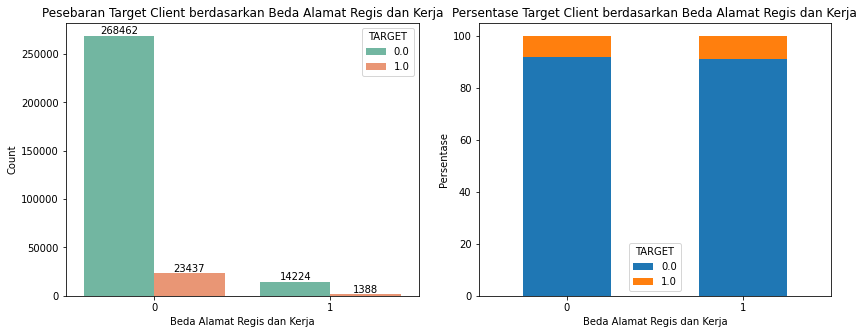

In [50]:
# pesebaran data Beda Alamat Regis dan Kerja dan perbandingannya dengan TARGET
col = 'REG_REGION_NOT_WORK_REGION'
title_c = 'Pesebaran Target Client berdasarkan Beda Alamat Regis dan Kerja'
title_b = 'Persentase Target Client berdasarkan Beda Alamat Regis dan Kerja'
label = 'Beda Alamat Regis dan Kerja'

vis_cat(col, title_c, title_b, label)

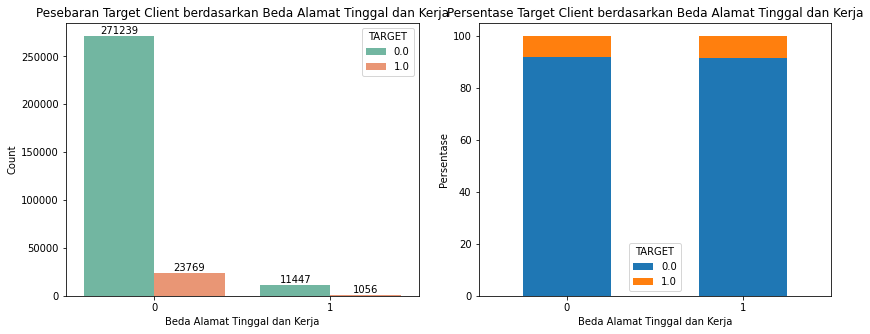

In [51]:
# pesebaran data Beda Alamat Tinggal dan Kerja dan perbandingannya dengan TARGET
col = 'LIVE_REGION_NOT_WORK_REGION'
title_c = 'Pesebaran Target Client berdasarkan Beda Alamat Tinggal dan Kerja'
title_b = 'Persentase Target Client berdasarkan Beda Alamat Tinggal dan Kerja'
label = 'Beda Alamat Tinggal dan Kerja'

vis_cat(col, title_c, title_b, label)

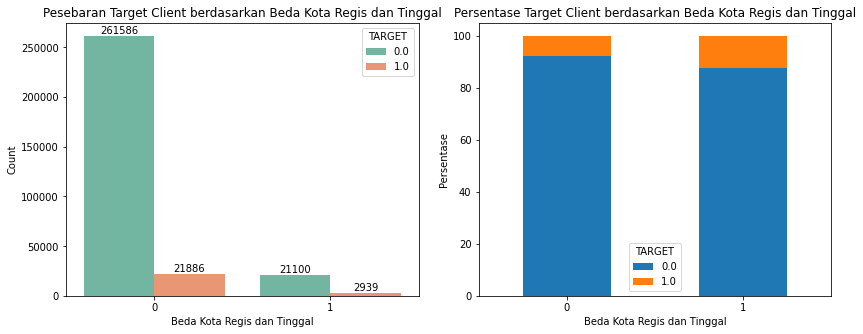

In [52]:
# pesebaran data Beda Kota Regis dan Tinggal dan perbandingannya dengan TARGET
col = 'REG_CITY_NOT_LIVE_CITY'
title_c = 'Pesebaran Target Client berdasarkan Beda Kota Regis dan Tinggal'
title_b = 'Persentase Target Client berdasarkan Beda Kota Regis dan Tinggal'
label = 'Beda Kota Regis dan Tinggal'

vis_cat(col, title_c, title_b, label)

Terlihat untuk klien yang kota pendaftaran dan kota tempat tinggalnya berbeda, memiliki persentase 'Bad' yang cukup tinggi.

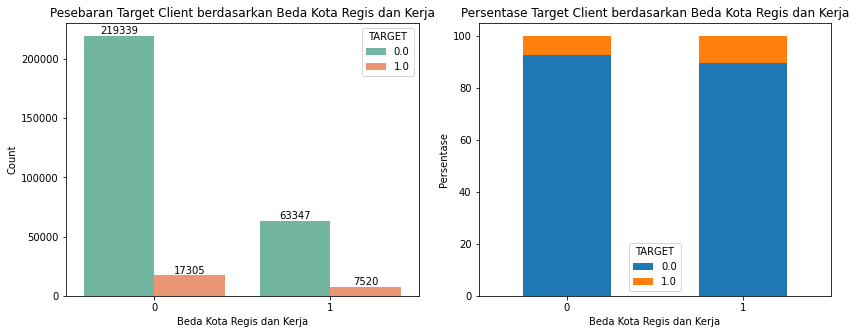

In [53]:
# pesebaran data Beda Kota Regis dan Kerja dan perbandingannya dengan TARGET
col = 'REG_CITY_NOT_WORK_CITY'
title_c = 'Pesebaran Target Client berdasarkan Beda Kota Regis dan Kerja'
title_b = 'Persentase Target Client berdasarkan Beda Kota Regis dan Kerja'
label = 'Beda Kota Regis dan Kerja'

vis_cat(col, title_c, title_b, label)

Terlihat untuk klien yang kota pendaftaran dan kota tempat kerjanya berbeda, memiliki persentase 'Bad' yang cukup tinggi.

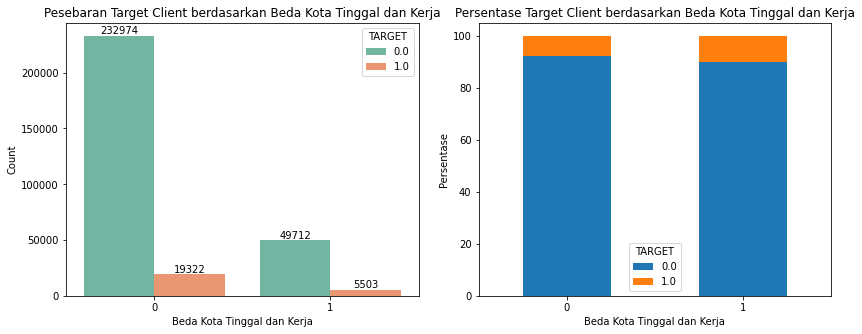

In [54]:
# pesebaran data Beda Kota Tinggal dan Kerja dan perbandingannya dengan TARGET
col = 'LIVE_CITY_NOT_WORK_CITY'
title_c = 'Pesebaran Target Client berdasarkan Beda Kota Tinggal dan Kerja'
title_b = 'Persentase Target Client berdasarkan Beda Kota Tinggal dan Kerja'
label = 'Beda Kota Tinggal dan Kerja'

vis_cat(col, title_c, title_b, label)

Terlihat untuk klien yang kota tempat tinggal dan kota tempat kerjanya berbeda, memiliki persentase 'Bad' yang cukup tinggi.

## - Kolom-kolom Numerikal terhadap kolom TARGET

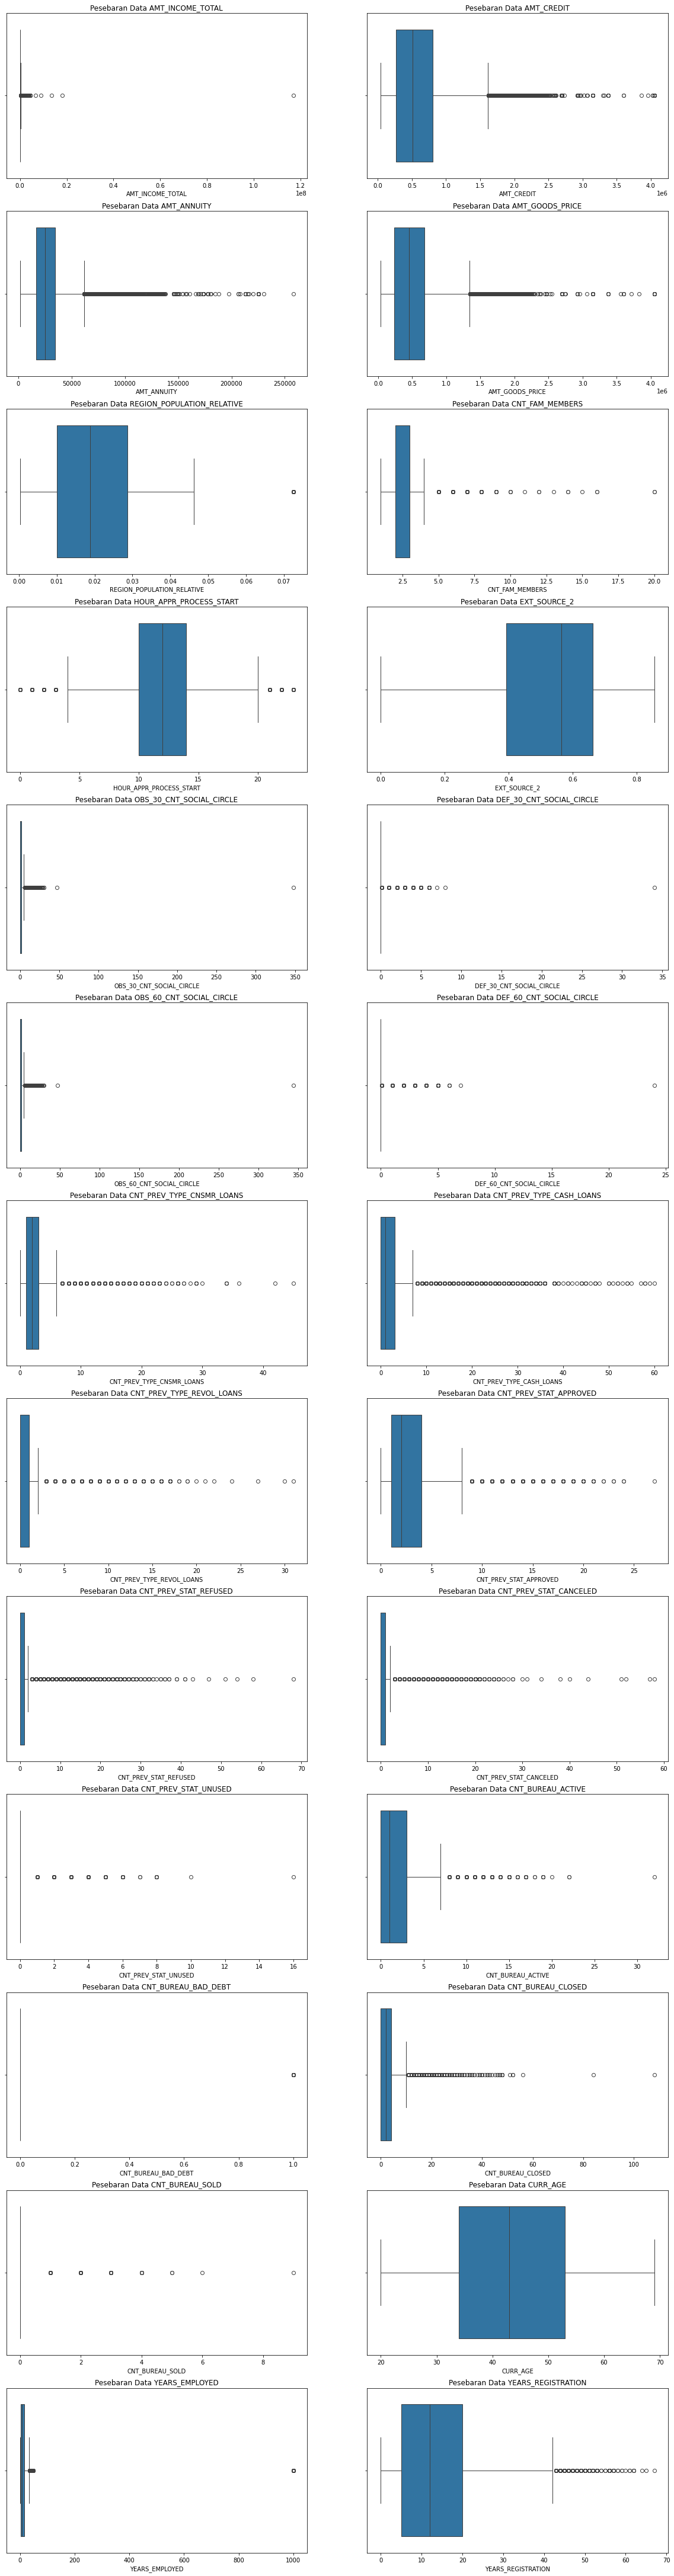

In [55]:
# list kolom-kolom numerik
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
             'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
             'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_PREV_TYPE_CNSMR_LOANS', 'CNT_PREV_TYPE_CASH_LOANS', 
             'CNT_PREV_TYPE_REVOL_LOANS', 'CNT_PREV_STAT_APPROVED', 'CNT_PREV_STAT_REFUSED', 'CNT_PREV_STAT_CANCELED',
             'CNT_PREV_STAT_UNUSED', 'CNT_BUREAU_ACTIVE', 'CNT_BUREAU_BAD_DEBT', 'CNT_BUREAU_CLOSED', 'CNT_BUREAU_SOLD', 
             'CURR_AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']

# visualisasikan pesebaran data setiap kolom numerik
plt.figure(figsize=(20, 85))
for i, col in enumerate(list(num_cols[:-1]), 1):
    plt.subplot(14, 2, i)
    sns.boxplot(x=col, data=data_train[data_train.columns[:-1]])
    plt.title("Pesebaran Data " + col)

Setelah dilakukan pengecekan pesebaran data numerik, terlihat pada beberapa kolom terdapat data-data anomali. Untuk mengatasi data anomali ini, dilakukan pengecekan terlebih dahulu, apakah data dapat diperbaiki atau tidak.

In [56]:
# terdapat income yang melebihi 5 juta bahkan 100 juta
data_train[data_train['AMT_INCOME_TOTAL'] > 5000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
12840,114967,1.0,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,1,1,0,1,0,0,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,34,2,18,9
77768,190160,0.0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,1,1,0,1,0,0,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Business Entity Type 1,0.504086,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,12.0,1.0,45,23,19,4
131127,252084,0.0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.009549,1,1,1,1,1,0,2.0,2,2,TUESDAY,14,0,1,1,0,1,1,Transport: type 4,0.552838,0.0,0.0,0.0,0.0,1.0,4.0,0.0,3.0,1.0,1.0,0.0,5.0,0.0,3.0,0.0,52,1,20,7
203693,336147,0.0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,1,1,0,1,0,0,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,1.0,0.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,13,9,12
246858,385674,0.0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,1,1,1,1,0,0,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,0.0,0.0,0.0,0.0,4.0,2.0,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,37,0,10,13


In [57]:
# Perbaiki data dengan membagi 1000 (kemungkinan kesalahan diakibatkan salah input data)
data_train.loc[12840, ['AMT_INCOME_TOTAL']] = data_train.loc[12840, ['AMT_INCOME_TOTAL']] / 1000

# Perbaiki data dengan membagi 10 (kemungkinan kesalahan diakibatkan salah input data)
data_train.loc[77768, ['AMT_INCOME_TOTAL']] = data_train.loc[77768, ['AMT_INCOME_TOTAL']] / 10
data_train.loc[131127, ['AMT_INCOME_TOTAL']] = data_train.loc[131127, ['AMT_INCOME_TOTAL']] / 10
data_train.loc[203693, ['AMT_INCOME_TOTAL']] = data_train.loc[203693, ['AMT_INCOME_TOTAL']] / 10
data_train.loc[246858, ['AMT_INCOME_TOTAL']] = data_train.loc[246858, ['AMT_INCOME_TOTAL']] / 10

data_train.loc[[12840]]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
12840,114967,1.0,Cash loans,F,N,Y,1,117000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,1,1,0,1,0,0,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,34,2,18,9


In [58]:
# terdapat data yang cukup besar (kemungkinan salah input)
data_train[data_train['OBS_30_CNT_SOCIAL_CIRCLE'] > 300]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
148403,272071,0.0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,1,1,0,1,0,0,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,Police,0.304506,348.0,34.0,344.0,24.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,27,5,6,6


In [59]:
# Perbaiki data dengan membagi 10 (kemungkinan kesalahan diakibatkan salah input data)
data_train.loc[148403, ['OBS_30_CNT_SOCIAL_CIRCLE']] = int(data_train.loc[148403, ['OBS_30_CNT_SOCIAL_CIRCLE']] / 10)
data_train.loc[148403, ['DEF_30_CNT_SOCIAL_CIRCLE']] = int(data_train.loc[148403, ['DEF_30_CNT_SOCIAL_CIRCLE']] / 10)
data_train.loc[148403, ['OBS_60_CNT_SOCIAL_CIRCLE']] = int(data_train.loc[148403, ['OBS_60_CNT_SOCIAL_CIRCLE']] / 10)
data_train.loc[148403, ['DEF_60_CNT_SOCIAL_CIRCLE']] = int(data_train.loc[148403, ['DEF_60_CNT_SOCIAL_CIRCLE']] / 10)

data_train.loc[[148403]]

C:\Users\USER\AppData\Local\Temp/ipykernel_1048/1120656369.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data_train.loc[148403, ['OBS_30_CNT_SOCIAL_CIRCLE']] = int(data_train.loc[148403, ['OBS_30_CNT_SOCIAL_CIRCLE']] / 10)
C:\Users\USER\AppData\Local\Temp/ipykernel_1048/1120656369.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data_train.loc[148403, ['DEF_30_CNT_SOCIAL_CIRCLE']] = int(data_train.loc[148403, ['DEF_30_CNT_SOCIAL_CIRCLE']] / 10)
C:\Users\USER\AppData\Local\Temp/ipykernel_1048/1120656369.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data_train.loc[148403, ['OBS_60_CNT_SOCIAL_CIRCLE']] = int(data_train.loc[148403, ['OBS_60_CNT_SOCIAL_CIRCLE']] / 10)
C:\Users\USER\AppData\Local\

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
148403,272071,0.0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,1,1,0,1,0,0,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,Police,0.304506,34.0,3.0,34.0,2.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,27,5,6,6


In [60]:
# terdapat data lama bekerja hingga lebih 100 tahun (kemungkinan salah input)
data_train[data_train['YEARS_EMPLOYED'] > 100]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
8,100011,0.0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,1,0,0,1,0,0,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,1.0,0.0,1.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,55,1000,20,9
11,100015,0.0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,1,0,0,1,1,0,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,55,1000,14,6
23,100027,0.0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,1,0,0,1,1,0,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,68,1000,24,10
38,100045,0.0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,1,0,0,1,1,0,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.650765,0.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,65,1000,26,13
43,100050,0.0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,1,0,0,1,0,0,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.766138,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,64,1000,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0.0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,1,0,0,1,0,0,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,0.195625,11.0,2.0,11.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,7.0,0.0,61,1000,32,11
307483,456227,0.0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,1,0,0,1,0,0,1.0,2,2,MONDAY,12,0,0,0,0,0,0,XNA,0.589906,1.0,1.0,1.0,1.0,1.0,7.0,0.0,5.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,68,1000,30,11
307487,456231,0.0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,1,0,0,1,0,0,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,0.307082,0.0,0.0,0.0,0.0,2.0,11.0,1.0,5.0,4.0,5.0,0.0,3.0,0.0,4.0,0.0,63,1000,15,11
307505,456249,0.0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,1,0,0,1,1,0,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,0.346391,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,11.0,0.0,66,1000,20,6


In [61]:
# Terdapat 55.374 baris data yang tidak valid di kolom 'YEARS_EMPLOYED'
# Untuk menangani data yang tidak valid sebanyak ini, maka dilakukan penghapusan kolom YEARS_EMPLOYED
data_train = data_train.drop(columns=['YEARS_EMPLOYED'])

# list kembali kolom-kolom numerik
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
             'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
             'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'CNT_PREV_TYPE_CNSMR_LOANS', 'CNT_PREV_TYPE_CASH_LOANS', 
             'CNT_PREV_TYPE_REVOL_LOANS', 'CNT_PREV_STAT_APPROVED', 'CNT_PREV_STAT_REFUSED', 'CNT_PREV_STAT_CANCELED',
             'CNT_PREV_STAT_UNUSED', 'CNT_BUREAU_ACTIVE', 'CNT_BUREAU_BAD_DEBT', 'CNT_BUREAU_CLOSED', 'CNT_BUREAU_SOLD', 
             'CURR_AGE', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']

#### Visualisasi ulang data yang sudah diperbaiki

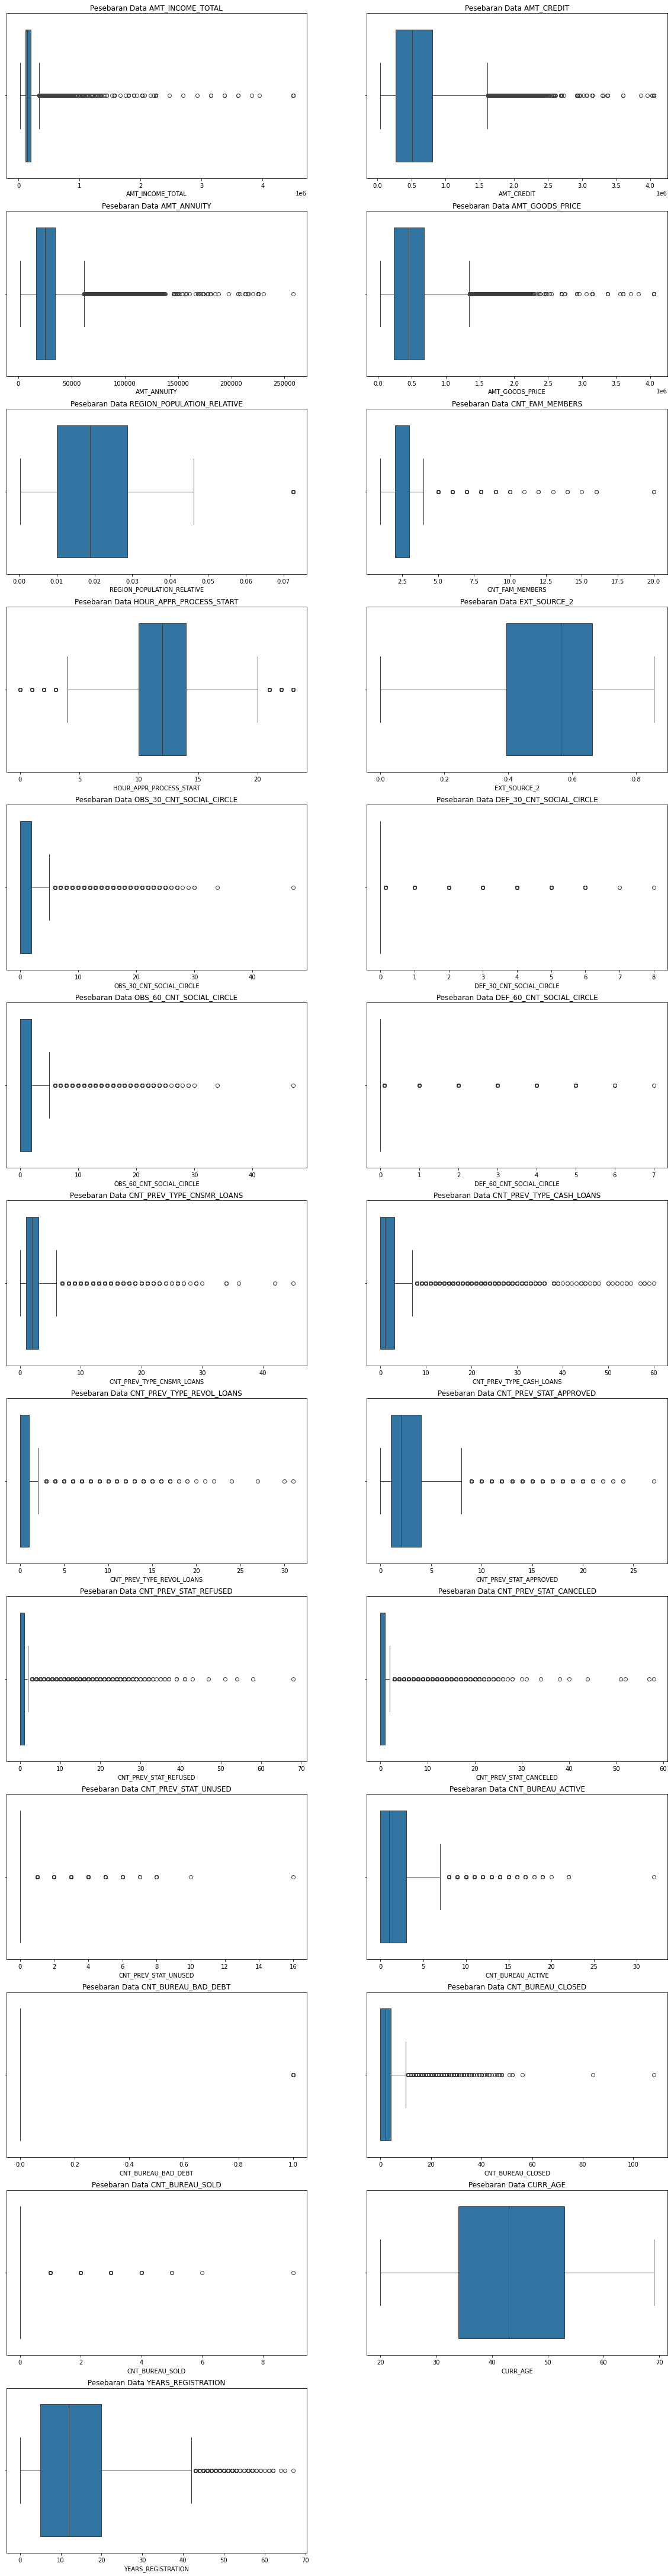

In [62]:
# visualisasikan pesebaran data setiap kolom numerik dengan boxplot
plt.figure(figsize=(20, 85))
for i, col in enumerate(list(num_cols[:-1]), 1):
    plt.subplot(14, 2, i)
    sns.boxplot(x=col, data=data_train[data_train.columns[:-1]])
    plt.title("Pesebaran Data " + col)

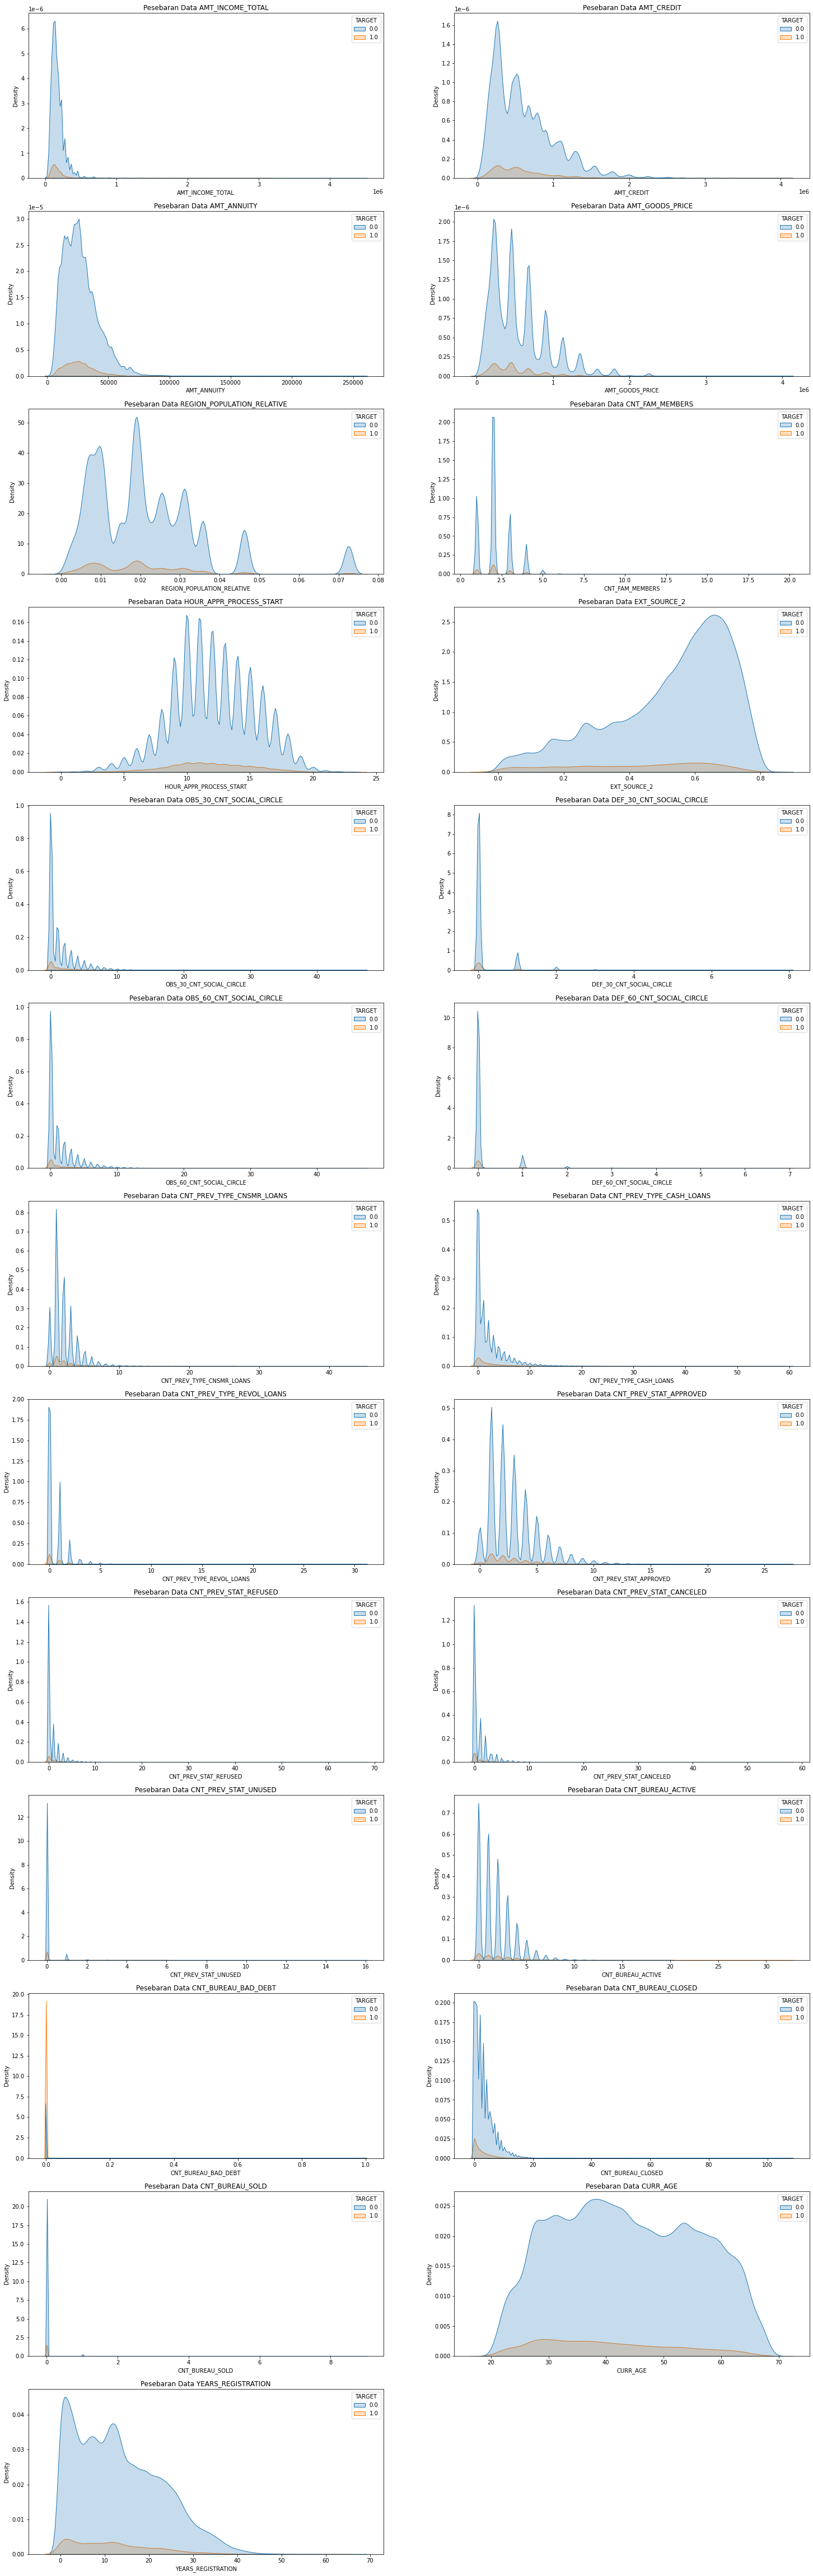

In [63]:
# visualisasikan pesebaran data setiap kolom numerik terhadap TARGET dengan kdeplot
plt.figure(figsize=(25, 90))
for i, col in enumerate(list(num_cols[:-1]), 1):
    plt.subplot(14, 2, i)
    sns.kdeplot(x=col, data=data_train[data_train.columns[:-1]], hue='TARGET', fill=True)
    plt.title("Pesebaran Data " + col)

Hasil visualisasi pesebaran data numerik berdasarkan data TARGET hampir keseluruhan menunjukkan pola yang sama; semakin meningkat pesebaran data pada suatu rentang nilai, maka data TARGET juga akan mengikuti kenaikan tersebut.

Namun, terlihat pada kolom `CURR_AGE`, meskipun terjadi peningkatan pesebaran pada rentang umur 50 - 60 pesebaran 'Bad' client cenderung jarang. Artinya pada rentang umur segitu, cenderung tidak terjadi gagal pembayaran.

Kemudian, pada kolom `CNT_BUREAU_BAD_DEBT`, menunjukkan bahwa apabila ada catatan hutang parah di biro kredit lain, maka client tersebut juga akan gagal bayar sangat mungkin terjadi.

In [64]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13  NAME

# - Modelling

## Feature Encoding

In [65]:
# Copy dataframe terlebih dahulu
data_use = data_train.copy()

In [66]:
# Label Encoding untuk beberapa kolom
from sklearn.preprocessing import LabelEncoder

# Fit dan transform kolom-kolom yang hendak di Label Encoding
data_use['ORGANIZATION_TYPE'] = LabelEncoder().fit_transform(data_use['ORGANIZATION_TYPE'])
data_use['FLAG_OWN_CAR'] = LabelEncoder().fit_transform(data_use['FLAG_OWN_CAR'])
data_use['FLAG_OWN_REALTY'] = LabelEncoder().fit_transform(data_use['FLAG_OWN_REALTY'])

# One Hot Encoding features yang tersisa
data_use = pd.get_dummies(data_use, dtype=int)

data_use

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_REGISTRATION,YEARS_ID_PUBLISH,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100002,1.0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,5,0.262949,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,25,9,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,100003,0.0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,39,0.622246,1.0,0.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,45,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,100004,0.0,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,11,0.555912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,52,11,6,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,100006,0.0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,5,0.650442,2.0,0.0,2.0,0.0,2.0,5.0,2.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,52,26,6,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,100007,0.0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,37,0.322738,0.0,0.0,0.0,0.0,2.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54,11,9,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,43,0.681632,0.0,0.0,0.0,0.0,

In [67]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 0 to 307510
Data columns (total 88 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  float64
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   CNT_CHILDREN                                       307511 non-null  int64  
 5   AMT_INCOME_TOTAL                                   307511 non-null  float64
 6   AMT_CREDIT                                         307511 non-null  float64
 7   AMT_ANNUITY                                        307511 non-null  float64
 8   AMT_GOODS_PRICE                                    307511 non-null  float64
 9 

In [111]:
# Define variabel X dan y
X = data_use.drop(columns=['SK_ID_CURR', 'TARGET'])
y = data_use['TARGET']

In [112]:
from sklearn.model_selection import train_test_split

# split data menjadi training dan testing set dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LogisticRegression

In [70]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression menggunakan semua features
# membuat objek LogisticRegression
lreg = LogisticRegression()

# train model LogisticRegression
lreg.fit(X_train, y_train)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
# hasil prediksi model
lreg_pred = lreg.predict(X_test)

In [72]:
# Evaluasi model menggunakan beberapa metrik berbeda
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
print(accuracy_score(y_test, lreg_pred))
print(precision_score(y_test, lreg_pred, average='macro'))
print(recall_score(y_test, lreg_pred, average='macro'))
print(confusion_matrix(y_test, lreg_pred))

0.9195161211648212
0.4597655360801275
0.49999115889238605
[[56553     1]
 [ 4949     0]]


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [74]:
# Hasil prediksi
rfclass_pred = classifier_rf.predict(X_test)

In [75]:
# Evaluasi Random Forest
print(accuracy_score(y_test, rfclass_pred))
print(precision_score(y_test, rfclass_pred, average='macro'))
print(recall_score(y_test, rfclass_pred, average='macro'))
print(confusion_matrix(y_test, rfclass_pred))

0.9195323805342829
0.45976619026714144
0.5
[[56554     0]
 [ 4949     0]]


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dilihat dari metrik recall yang dihasilkan oleh kedua base model LogisticRegression dan Random Forest, tampak kedua model memiliki performa yang tidak baik.

### Resampling: Undersampling

In [76]:
len(data_use[(data_use['TARGET'] == 0)])

282686

In [77]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = data_use[(data_use['TARGET'] == 0)] 
df_minority = data_use[(data_use['TARGET'] == 1)] 

# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 24825, # to match majority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [78]:
df_downsampled

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_PREV_TYPE_CNSMR_LOANS,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_TYPE_REVOL_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_STAT_REFUSED,CNT_PREV_STAT_CANCELED,CNT_PREV_STAT_UNUSED,CNT_BUREAU_ACTIVE,CNT_BUREAU_BAD_DEBT,CNT_BUREAU_CLOSED,CNT_BUREAU_SOLD,CURR_AGE,YEARS_REGISTRATION,YEARS_ID_PUBLISH,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
132760,253982,0.0,0,0,0,112500.0,508500.0,24462.0,508500.0,0.007020,1,1,0,1,0,0,2.0,2,2,11,0,0,0,0,0,0,42,0.192316,9.0,0.0,9.0,0.0,1.0,2.0,2.0,3.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0,54,23,6,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
159905,285361,0.0,0,0,2,261000.0,390384.0,44280.0,351000.0,0.003069,1,1,0,1,0,0,4.0,3,3,14,0,0,0,0,0,0,51,0.673386,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,33,2,4,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
143642,266559,0.0,1,1,0,225000.0,533668.5,22738.5,477000.0,0.010966,1,1,0,1,0,0,2.0,2,2,11,0,0,0,0,0,0,1,0.708957,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,6.0,0.0,40,19,15,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
281969,426602,0.0,0,0,0,130500.0,405000.0,27396.0,405000.0,0.014520,1,1,0,1,0,0,2.0,2,2,10,0,0,0,0,0,0,33,0.296180,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,1.0,2.0,0.0,2.0,0.0,7.0,0.0,32,14,10,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
130496,251361,0.0,0,1,0,189000.0,573408.0,29407.5,495000.0,0.010966,1,1,0,1,0,0,1.0,2,2,9,0,0,0,0,0,0,16,0.348305,1.0,0.0,1.0,0.0,2.0,5.0,0.0,2.0,4.0,1.0,0.0,3.0,0.0,8.0,0.0,40,19,12,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1.0,0,0,1,207000.0,450000.0,32746.5,450000.0,0.020246,1,1,1,1,0,0,3.0,3,3,16,0,0,0,0,0,

In [115]:
# Define variabel X dan y
X = df_downsampled.drop(columns=['SK_ID_CURR', 'TARGET'])
y = df_downsampled['TARGET']

# split data menjadi training dan testing set dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# LogisticRegression menggunakan semua features
# membuat objek LogisticRegression
lreg = LogisticRegression()

# train model LogisticRegression
lreg.fit(X_train, y_train)

# hasil prediksi model
lreg_pred = lreg.predict(X_test)

# Evaluasi model menggunakan beberapa metrik berbeda
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print(accuracy_score(y_test, lreg_pred))
print(precision_score(y_test, lreg_pred, average='macro'))
print(recall_score(y_test, lreg_pred, average='macro'))
print(confusion_matrix(y_test, lreg_pred))

0.5904330312185297
0.5909339914130347
0.5905155842861414
[[3094 1859]
 [2208 2769]]


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

# Hasil prediksi
rfclass_pred = classifier_rf.predict(X_test)

# Evaluasi Random Forest
print(accuracy_score(y_test, rfclass_pred))
print(precision_score(y_test, rfclass_pred, average='macro'))
print(recall_score(y_test, rfclass_pred, average='macro'))
print(confusion_matrix(y_test, rfclass_pred))

0.6455186304128903
0.6455171788768623
0.6455112049650074
[[3182 1771]
 [1749 3228]]


## LightGBM

In [116]:
# rename the columns' name first
import re

X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [117]:
# build the lightgbm model
import lightgbm as lgb

clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)

# Hasil prediksi
clf_pred = clf.predict(X_test)

# Evaluasi Random Forest
print(accuracy_score(y_test, clf_pred))
print(precision_score(y_test, clf_pred, average='macro'))
print(recall_score(y_test, clf_pred, average='macro'))
print(confusion_matrix(y_test, clf_pred))

[LightGBM] [Info] Number of positive: 19848, number of negative: 19872
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1872
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499698 -> initscore=-0.001208
[LightGBM] [Info] Start training from score -0.001208
0.6734138972809668
0.6734465614342114
0.6734278103260462
[[3364 1589]
 [1654 3323]]


## CatBoost Classifier

In [89]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(logging_level='Silent')

cbc.fit(X_train, y_train)

cbc_pred = cbc.predict(X_test)

# Evaluasi Random Forest
print(accuracy_score(y_test, cbc_pred))
print(precision_score(y_test, cbc_pred, average='macro'))
print(recall_score(y_test, cbc_pred, average='macro'))
print(confusion_matrix(y_test, cbc_pred))

0.6732124874118832
0.6732702794819359
0.6732317540151688
[[3374 1579]
 [1666 3311]]


In [90]:
cb_importances = cbc.get_feature_importance(type='PredictionValuesChange')
cb_feature_importances = pd.Series(cb_importances, index=X.columns).sort_values()

In [94]:
print(cb_feature_importances.to_string())

NAME_INCOME_TYPE_Student                              0.000000
NAME_TYPE_SUITE_Group of people                       0.000000
NAME_INCOME_TYPE_Businessman                          0.000000
FLAG_MOBIL                                            0.000000
NAME_INCOME_TYPE_Unemployed                           0.000744
CNT_BUREAU_BAD_DEBT                                   0.000920
NAME_INCOME_TYPE_Maternity leave                      0.001638
NAME_EDUCATION_TYPE_Academic degree                   0.022730
NAME_TYPE_SUITE_Other_A                               0.027840
NAME_HOUSING_TYPE_Co-op apartment                     0.028502
REG_REGION_NOT_WORK_REGION                            0.073650
FLAG_CONT_MOBILE                                      0.080527
NAME_TYPE_SUITE_Children                              0.081972
NAME_FAMILY_STATUS_Single / not married               0.103849
NAME_EDUCATION_TYPE_Incomplete higher                 0.113316
NAME_HOUSING_TYPE_Rented apartment                    0

In [100]:
# Pilih kolom dengan nilai importance tertinggi
selected_cols = ['TARGET', 'CODE_GENDER', 'CNT_PREV_TYPE_REVOL_LOANS', 'NAME_EDUCATION_TYPE', 'CNT_PREV_TYPE_CASH_LOANS', 'CNT_PREV_STAT_APPROVED', 
 'CNT_PREV_TYPE_CNSMR_LOANS', 'ORGANIZATION_TYPE', 'HOUR_APPR_PROCESS_START', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 
 'REGION_POPULATION_RELATIVE', 'CNT_PREV_STAT_REFUSED', 'AMT_INCOME_TOTAL', 'CNT_BUREAU_CLOSED', 'CNT_BUREAU_ACTIVE', 
 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CURR_AGE', 'AMT_CREDIT', 'EXT_SOURCE_2']

new_data = data_train[selected_cols]

new_data

,TARGET,CODE_GENDER,CNT_PREV_TYPE_REVOL_LOANS,NAME_EDUCATION_TYPE,CNT_PREV_TYPE_CASH_LOANS,CNT_PREV_STAT_APPROVED,CNT_PREV_TYPE_CNSMR_LOANS,ORGANIZATION_TYPE,HOUR_APPR_PROCESS_START,YEARS_REGISTRATION,YEARS_ID_PUBLISH,REGION_POPULATION_RELATIVE,CNT_PREV_STAT_REFUSED,AMT_INCOME_TOTAL,CNT_BUREAU_CLOSED,CNT_BUREAU_ACTIVE,AMT_GOODS_PRICE,AMT_ANNUITY,CURR_AGE,AMT_CREDIT,EXT_SOURCE_2
0,1.0,M,0.0,Secondary / secondary special,0.0,1.0,1.0,Business Entity Type 3,10,9,5,0.018801,0.0,202500.0,6.0,2.0,351000.0,24700.5,25,406597.5,0.262949
1,0.0,F,0.0,Higher education,1.0,3.0,2.0,School,11,3,0,0.003541,0.0,270000.0,3.0,1.0,1129500.0,35698.5,45,1293502.5,0.622246
2,0.0,M,0.0,Secondary / secondary special,0.0,1.0,1.0,Government,9,11,6,0.010032,0.0,67500.0,2.0,0.0,135000.0,6750.0,52,135000.0,0.555912
3,0.0,F,2.0,Secondary / secondary special,5.0,5.0,2.0,Business Entity Type 3,17,26,6,0.008019,1.0,135000.0,0.0,0.0,297000.0,29686.5,52,312682.5,0.650442
4,0.0,M,0.0,Secondary / secondary special,4.0,6.0,2.0,Religion,11,11,9,0.028663,0.0,121500.0,1.0,0.0,513000.0,21865.5,54,513000.0,0.322738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,M,0.0,Secondary / secondary special,0.0,1.0,1.0,Services,15,23,5,0.032561,0.0,157500.0,0.0,0.0,225000.0,27558.0,25,254700.0,0.681632
307507,0.0,F,0.0,Secondary / secondary special,0.0,1.0,1.0,XNA,8,12,11,0.025164,0.0,72000.0,0.0,0.0,225000.0,12001.5,56,269550.0,0.115992
307508,0.0,F,0.0,Higher education,0.0,2.0,2.0,School,9,18,14,0.005002,0.0,153000.0,2.0,2.0,585000.0,29979.0,41,677664.0,0.535722
307509,1.0,F,0.0,Secondary / secondary special,0.0,2.0,2.0,Business Entity Type 1,9,7,2,0.005313,0.0,171000.0,1.0,0.0,319500.0,20205.0,32,370107.0,0.514163


In [101]:
# One Hot Encoding features yang tersisa
new_data = pd.get_dummies(new_data, dtype=int)

# Define variabel X dan y
X_new = new_data.drop(columns=['TARGET'])
y_new = new_data['TARGET']

# split data menjadi training dan testing set dengan perbadingan 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

### CatBoost dengan Kolom-kolom Pilihan

In [103]:
cbc2 = CatBoostClassifier(logging_level='Silent')

cbc2.fit(X_train2, y_train2)

cbc2_pred = cbc2.predict(X_test2)

# Evaluasi Random Forest
print(accuracy_score(y_test2, cbc2_pred))
print(precision_score(y_test2, cbc2_pred, average='macro'))
print(recall_score(y_test2, cbc2_pred, average='macro'))
print(confusion_matrix(y_test2, cbc2_pred))

0.919386046209128
0.6964832443526077
0.5070190141087071
[[56468    86]
 [ 4872    77]]


### LightGBM dengan Kolom-kolom Pilihan

In [105]:
# rename nama-nama kolom
X_train2 = X_train2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test2 = X_test2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [106]:
clf2 = lgb.LGBMClassifier()

clf2.fit(X_train2, y_train2)

# Hasil prediksi
clf2_pred = clf2.predict(X_test2)

# Evaluasi Random Forest
print(accuracy_score(y_test2, clf2_pred))
print(precision_score(y_test2, clf2_pred, average='macro'))
print(recall_score(y_test2, clf2_pred, average='macro'))
print(confusion_matrix(y_test2, clf2_pred))

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
0.9194510836869746
0.6923826459211054
0.5029980447807442
[[56516    38]
 [ 4916    33]]


Dari hasil beberapa percobaan training, didapatkan hasil terbaik adalah model **LightGBM** dengan dataset yang menggunakan keseluruhan kolom yang telah diproses dan dataset yang telah dilakukan undersampling.

#### LightGBM Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for the hyperparameters to search through
param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Initialize an empty dictionary to store the best hyperparameters and their values
best_hyperparameters = {}
best_values = {}
 
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt')
 
# Initialize GridSearchCV for hyperparameters
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5)
 
# Fit the model to the training data to search for the best hyperparameters
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters and their values
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499685 -> initscore=-0.001259
[LightGBM] [Info] Start training from score -0.001259
[LightGBM] [Info] Number of positive: 15878, number of negative: 15898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1857
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 79
[LightGBM] [

[LightGBM] [Info] Number of positive: 19848, number of negative: 19872
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1872
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499698 -> initscore=-0.001208
[LightGBM] [Info] Start training from score -0.001208


In [109]:
# Train a LightGBM model with the best hyperparameters
best_lgb_model = lgb.LGBMClassifier(**best_params)
best_lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 19848, number of negative: 19872
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1872
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499698 -> initscore=-0.001208
[LightGBM] [Info] Start training from score -0.001208


LGBMClassifier(learning_rate=0.05, n_estimators=150)

In [119]:
# Hasil prediksi
best_pred = best_lgb_model.predict(X_test)

# Evaluasi Random Forest
print(accuracy_score(y_test, best_pred))
print(precision_score(y_test, best_pred, average='macro'))
print(recall_score(y_test, best_pred, average='macro'))
print(roc_auc_score(y_test, best_pred))
print(confusion_matrix(y_test, best_pred))

0.6731117824773414
0.6731205362143069
0.6731181484495548
0.6731181484495549
[[3347 1606]
 [1640 3337]]


Dari hasil percobaan Hyperparameter Tuning LightGBM, didapatkan hasil terbaik adalah model LightGBM dengan hyperparameter default. Dengan nilai Precision dan Recall yang seimbang mencapai hingga: **67,34%**